In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
#  draw a heatmap of matrix A
def draw_heatmap(A):
    fig = plt.figure(figsize = (8,6))
    plt.pcolor(A, cmap=plt.cm.get_cmap('Blues'))
    plt.xticks(range(0, 11))
    plt.yticks(range(0, 11))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.grid() 
    plt.show()

In [3]:
#  draw arrow map of matrix
def draw_arrow(action):
    row = len(action)
    col = len(action[0])
    fig = plt.figure(figsize = (8,8))
    ax = fig.gca()
    for i in range(row):
        for j in range(col):
            if(action[i][j]==0):    #up
                plt.arrow(j+0.5,i+0.8,0,-0.6,width=0.05)
            elif(action[i][j]==1): #down
                plt.arrow(j+0.5,i+0.2,0,0.6,width=0.05)
            elif(action[i][j]==2): #left 
                plt.arrow(j+0.8,i+0.5,-0.6,0,width=0.05)
            elif(action[i][j]==3): #right   
                plt.arrow(j+0.2,i+0.5,0.6,0,width=0.05)
                
    ax.set_xticks(np.arange(0,col+1,1))
    ax.set_yticks(np.arange(0,row+1,1))
    plt.gca().invert_yaxis()
    plt.grid()   
    plt.show()

In [4]:
#  plot value in form
def plt_value(value_set):
    row = len(value_set)
    col = len(value_set[0])
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca()
    for i in range(row):
        for j in range(col):
            plt.text(i+0.5,j+0.5,'%.8f' % value_set[i][j], ha='center', va= 'bottom',fontsize=10)
    ax.set_xticks(np.arange(0,col+1,1))
    ax.set_yticks(np.arange(0,row+1,1))
    plt.gca().invert_yaxis()
    plt.grid()
    
    plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Reward1 heatmap


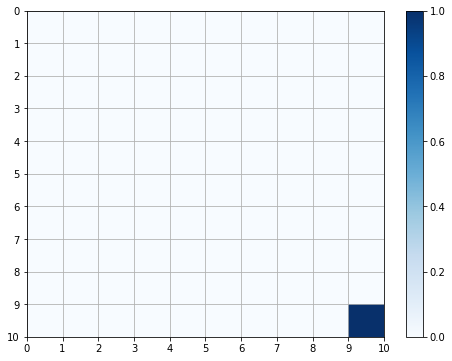

In [5]:
# reward1
reward1 = np.zeros((10,10))
reward1[9][9]+=1
print reward1
print 'Reward1 heatmap'
draw_heatmap(reward1)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100. -100. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.   10.]]
Reward2 heatmap


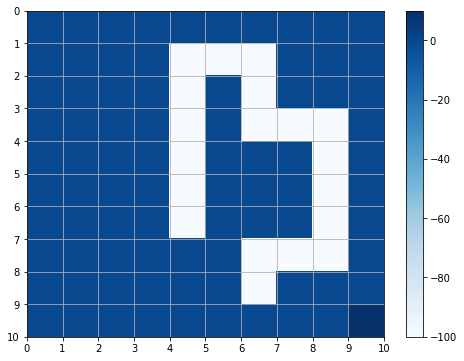

In [6]:
# reward 2
reward2 = np.zeros((10,10))
reward2[9][9]=10
reward2[1][5]=reward2[1][6]=-100
for i in [1,2,3,4,5,6]:
    reward2[i][4]=-100
reward2[2][6]=reward2[3][6]=reward2[3][7]=reward2[3][8]=-100
for i in [4,5,6,7]:
    reward2[i][8]=-100
reward2[7][6]=reward2[7][7]=-100
reward2[8][6]=-100
print reward2
print 'Reward2 heatmap'
draw_heatmap(reward2)

# Question 2--9

In [7]:
#  Initialization ST: S matrix; discount; AT: A matrix

ST=np.arange(100).reshape(10, 10).T
print ST
discount = 0.8

#  up, down, left, right
AT=([-1,0],[1,0],[0,-1],[0,1])
#  use AT[0], AT[1], AT[2], AT[3]


[[ 0 10 20 30 40 50 60 70 80 90]
 [ 1 11 21 31 41 51 61 71 81 91]
 [ 2 12 22 32 42 52 62 72 82 92]
 [ 3 13 23 33 43 53 63 73 83 93]
 [ 4 14 24 34 44 54 64 74 84 94]
 [ 5 15 25 35 45 55 65 75 85 95]
 [ 6 16 26 36 46 56 66 76 86 96]
 [ 7 17 27 37 47 57 67 77 87 97]
 [ 8 18 28 38 48 58 68 78 88 98]
 [ 9 19 29 39 49 59 69 79 89 99]]


In [8]:
#  help function
def is_neighbor(s,sp):
    j=s%10
    i=s/10
    
    n=sp%10
    m=sp/10
    
    if (m==i-1 and n==j)or(m==i+1 and n==j)or(m==i and n==j-1)or(m==i and n==j+1)or(m==i and n==j):
        return 1
    else:
        return 0
    
def transition_probability(s,sp,a):      
#          s: [j][i]
#         sp: [n][m]
#         AT[]= 0 up, 1 down, 2 left, 3 right
#         a=AT[0]---AT[3]
#         use a[0], a[1] 

    wind = 0.1
    j=s%10
    i=s/10
    
    n=sp%10
    m=sp/10
    
    if is_neighbor(s,sp)==0:
        return 0
        
        # intended state to move to?
    if(a[0]+j,a[1]+i)==(n,m):
        return 1 - wind + wind/4

        # If not the same point, move there by wind.
    if (j, i) != (n, m):
        return wind/4

        # If same point, we can only move here by either moving off the grid or being blown off the grid.
        # corner or not?
    if (j, i) in {(0, 0), (9, 9),(0, 9), (9, 0)}:
            # Corner.
            # Can move off the edge in two directions.
            # intend to move off the grid?
        if not (0 <= j + a[0] <=9 and 0 <= i + a[1] <=9 ):
            # intended to move off the grid, 
            return 1 - wind + 2*wind/4
        else:
            # can blow off the grid in either direction only by wind.
            return 2*wind/4
    else:
            # Not a corner. Is it an edge?
        if (j in {1,2,3,4,5,6,7,8} and i in {1,2,3,4,5,6,7,8}):
            # Not an edge.
            return 0

            # Edge.
            # Can only move off the edge in one direction.
            # intend to move off the grid?
        if not (0 <= j + a[0] <=9 and 0 <= i + a[1] <=9 ):
            # intended to move off the grid
            return 1 - wind + wind/4
        else:
            # can blow off the grid only by wind.
            return wind/4


In [35]:
def value_iteration(ST,AT,discount,reward):
        
    V = np.zeros((10,10))

    delta = float("inf")
    count = 0
    threshold = 0.01
    while delta > threshold:
        delta = 0
        for row in ST:
            for s in row:
                vs=V[s%10][s/10]       
                sum0=sum1=sum2=sum3=0
                for row2 in ST:
                    for sp in row2:
                        sum0 += transition_probability(s,sp,AT[0])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                        sum1 += transition_probability(s,sp,AT[1])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                        sum2 += transition_probability(s,sp,AT[2])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                        sum3 += transition_probability(s,sp,AT[3])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                V[s%10][s/10]=max(sum0,sum1,sum2,sum3)
                delta=max(delta,abs(vs-V[s%10][s/10]))

        
#     print 'delta = ' + str(delta)
    E = np.zeros((10,10))
    for row in ST:
        for s in row:
            sum00= sum11= sum22= sum33 = 0
            for row2 in ST:
                for sp in row2:             
                    sum00 += transition_probability(s,sp,AT[0])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    sum11 += transition_probability(s,sp,AT[1])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    sum22 += transition_probability(s,sp,AT[2])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    sum33 += transition_probability(s,sp,AT[3])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    
            x=[sum00,sum11,sum22,sum33]        
            E[s%10][s/10]=np.argmax(x)

    return V,E

#  return V-matrix and E(action matrix)

# Question 2

In [10]:
#  when reward = reward1
(v1,E1) = value_iteration(ST,AT,discount,reward1)
print 'value set'
print v1
# print 'action set'
# print E1

value set
[[0.04179568 0.06283791 0.089742   0.12384898 0.16708096 0.22188288
  0.29135376 0.37942014 0.49098293 0.60964773]
 [0.06283791 0.08787011 0.12155728 0.16451357 0.21924607 0.28898976
  0.37787112 0.49106061 0.63321853 0.78735399]
 [0.089742   0.12155728 0.16438987 0.21913198 0.28890328 0.37782648
  0.49115592 0.63549019 0.81735527 1.01859718]
 [0.12384898 0.16451357 0.21913198 0.28889981 0.37782476 0.49115916
  0.6356006  0.81960951 1.05219113 1.31505855]
 [0.16708096 0.21924607 0.28890328 0.37782476 0.49115918 0.63560325
  0.81969511 1.05426506 1.35157155 1.69507283]
 [0.22188288 0.28898976 0.37782648 0.49115916 0.63560325 0.8196963
  1.05432164 1.35332408 1.73318006 2.18223115]
 [0.29135376 0.37787112 0.49115592 0.6356006  0.81969511 1.05432164
  1.35335083 1.73446085 2.21952677 2.80680236]
 [0.37942014 0.49106061 0.63549019 0.81960951 1.05426506 1.35332408
  1.73446085 2.22020148 2.839257   3.60762627]
 [0.49098293 0.63321853 0.81735527 1.05219113 1.35157155 1.73318006
  2

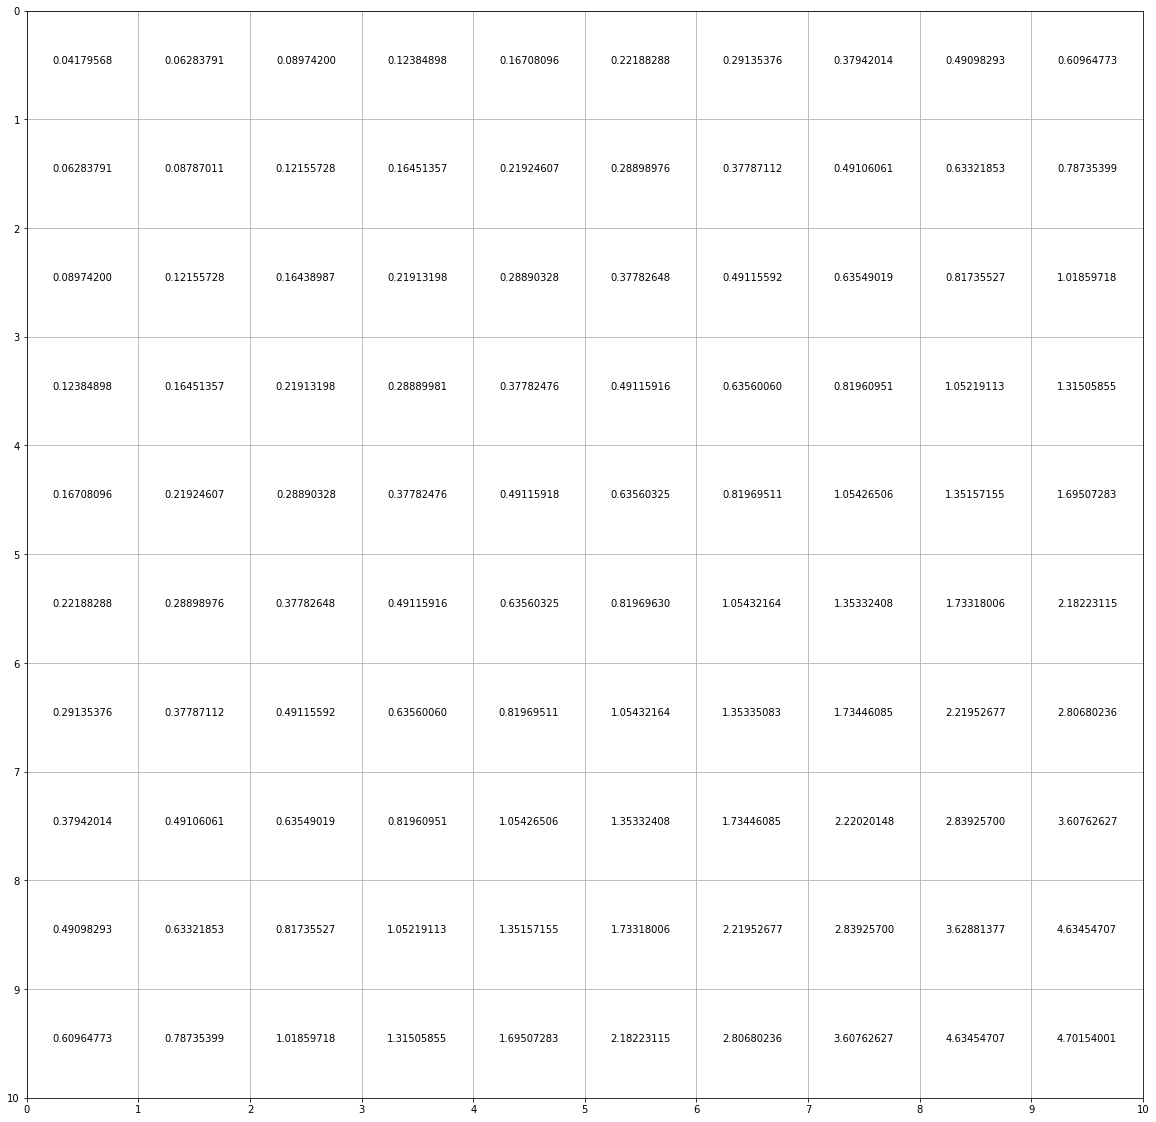

In [11]:
plt_value(v1)

# Question 3

optimal-value heatmap when use Reward1


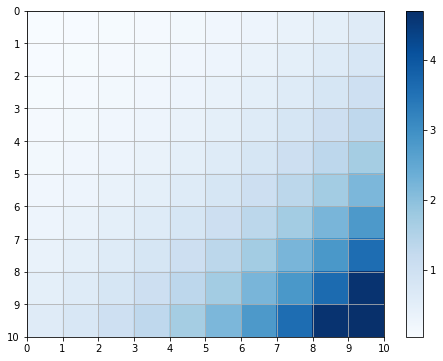

In [12]:
print "optimal-value heatmap when use Reward1"
draw_heatmap(v1)

# Question 5

optimal-action when use Reward1


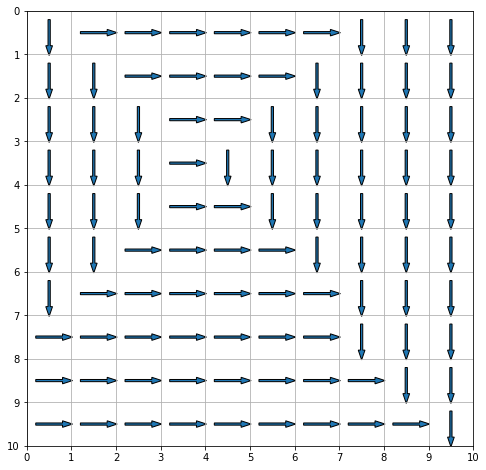

In [13]:
print "optimal-action when use Reward1"
draw_arrow(E1)

In [14]:
# print "optimal-action heatmap when use Reward1"
# draw_heatmap(E1)

# Question 6

In [15]:
#  when reward = reward2
(v2,E2) = value_iteration(ST,AT,discount,reward2)
print 'value set'
print v2
# print 'action set'
# print E2

value set
[[ 6.48477467e-01  7.94106515e-01  8.25237900e-01  5.36245558e-01
  -2.37043156e+00 -4.23381678e+00 -1.92052971e+00  1.13110795e+00
   1.59435584e+00  2.03820726e+00]
 [ 8.29851948e-01  1.02123596e+00  1.06603296e+00 -1.86790436e+00
  -6.73821942e+00 -8.67375446e+00 -6.36979468e+00 -1.29479626e+00
   1.92834321e+00  2.61046947e+00]
 [ 1.06360962e+00  1.31651254e+00  1.45007729e+00 -1.62402502e+00
  -6.74150886e+00 -1.39111818e+01 -9.64922518e+00 -5.51104325e+00
  -1.31012708e-01  3.35905866e+00]
 [ 1.36025245e+00  1.69269877e+00  1.94802285e+00 -1.23216899e+00
  -6.32308479e+00 -7.97760603e+00 -7.93667980e+00 -9.42386879e+00
  -1.91442835e+00  4.39062525e+00]
 [ 1.73657224e+00  2.17160228e+00  2.58983267e+00 -7.25587435e-01
  -5.83072992e+00 -3.25362550e+00 -3.23020014e+00 -7.41906241e+00
   1.71898209e+00  9.16310147e+00]
 [ 2.21393346e+00  2.78108417e+00  3.41709976e+00 -2.75630965e-02
  -5.09866208e+00 -5.49015498e-01 -4.76652804e-01 -2.96756313e+00
   6.58652246e+00  1.53

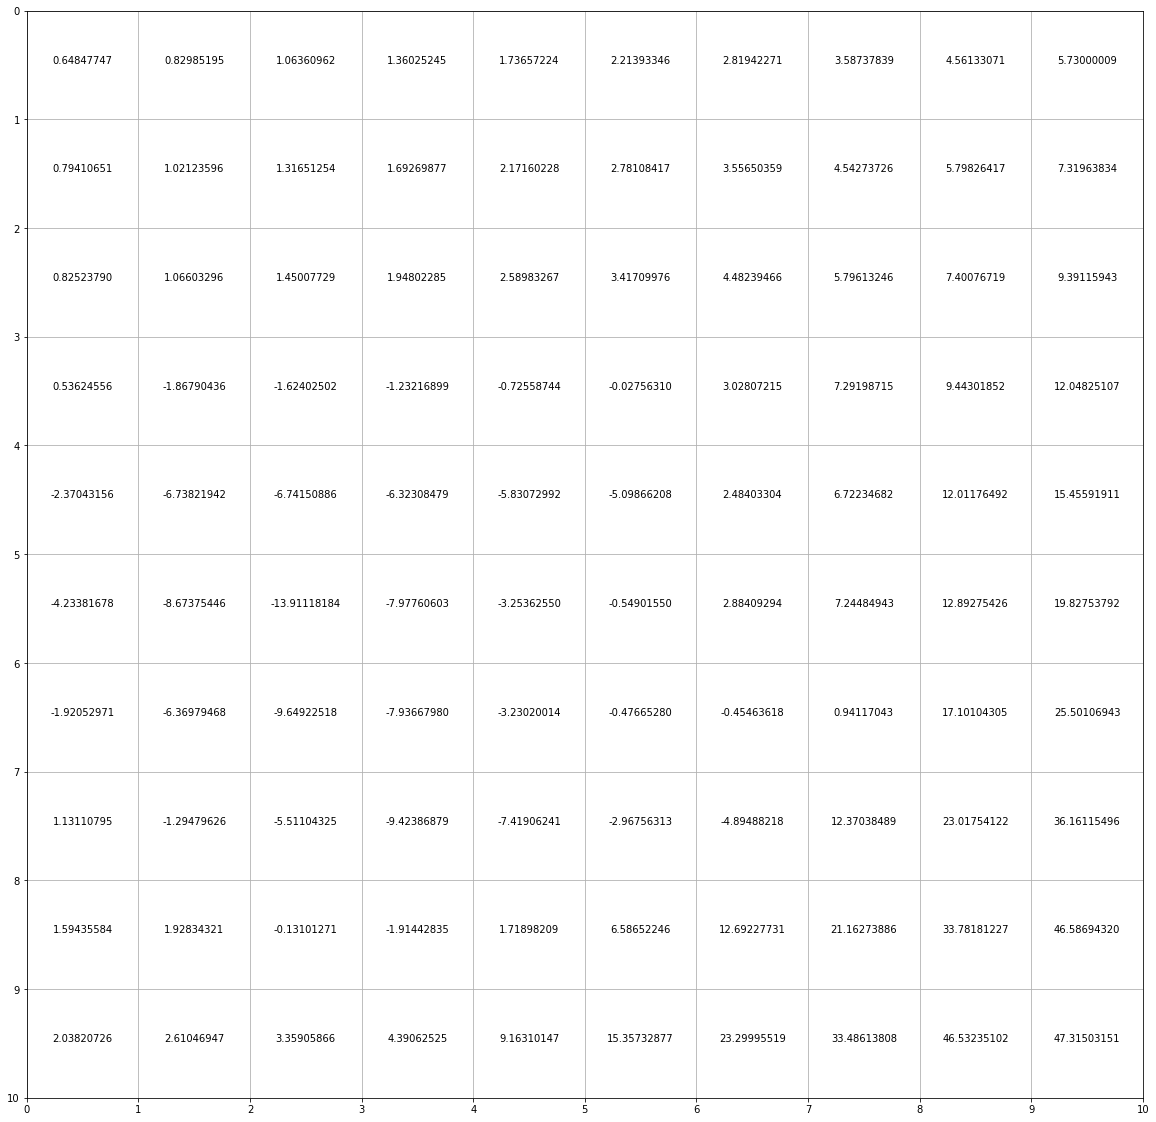

In [16]:
plt_value(v2)

# Question 7

optimal-value heatmap when use Reward2


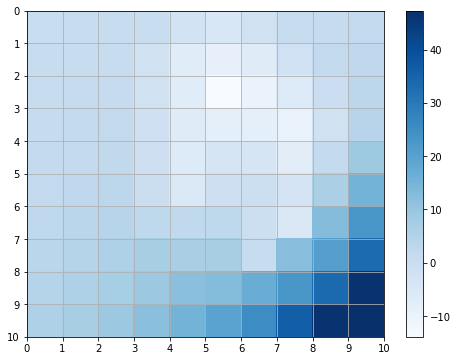

In [17]:
print "optimal-value heatmap when use Reward2"
draw_heatmap(v2)

# Question 9

optimal action when use reward2


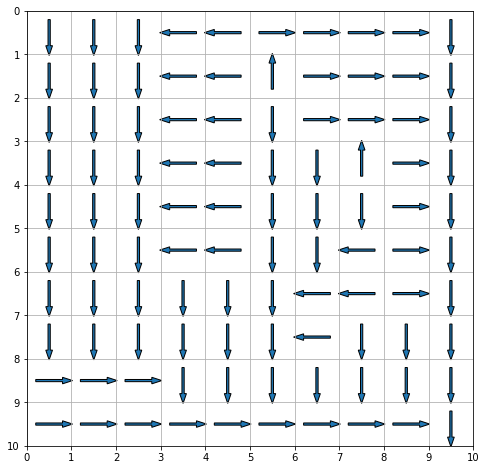

In [18]:
print 'optimal action when use reward2'
draw_arrow(E2)

In [19]:
# print "optimal-action heatmap when use Reward2"
# draw_heatmap(E2)

In [20]:
from cvxopt import matrix, solvers
#D = matrix.
#c = matrix.


# Question 11

In [21]:
def create_trans_prob(state_space, action_set, w):
    row = len(state_space)
    col = len(state_space[0])
    num_state = row*col
    action_type = len(action_set)
    trans_prob = [[[0 for i in range(action_type)] for j in range(num_state)] 
                  for n in range(num_state)]
    for pos in range(num_state):
        for act in action_set:
            #node inside the space
            if(pos//col!=0 and pos//col!=row-1 and pos%col!=0 and pos%col!=col-1):
                if(act=="up"):
                    trans_prob[pos][pos-col][1]=1-0.75*w
                    trans_prob[pos][pos+col][1]=0.25*w
                    trans_prob[pos][pos-1][1]=0.25*w
                    trans_prob[pos][pos+1][1]=0.25*w
                elif(act=="down"):
                    trans_prob[pos][pos-col][3]=0.25*w
                    trans_prob[pos][pos+col][3]=1-0.75*w
                    trans_prob[pos][pos-1][3]=0.25*w
                    trans_prob[pos][pos+1][3]=0.25*w
                elif(act=="right"):
                    trans_prob[pos][pos-col][2]=0.25*w
                    trans_prob[pos][pos+col][2]=0.25*w
                    trans_prob[pos][pos-1][2]=0.25*w
                    trans_prob[pos][pos+1][2]=1-0.75*w
                elif(act=="left"):
                    trans_prob[pos][pos-col][0]=0.25*w
                    trans_prob[pos][pos+col][0]=0.25*w
                    trans_prob[pos][pos-1][0]=1-0.75*w
                    trans_prob[pos][pos+1][0]=0.25*w
            #four corner nodes
            elif(pos==0):
                if(act=="up"):
                    trans_prob[0][0][1]=1-0.5*w
                    trans_prob[0][1][1]=0.25*w
                    trans_prob[0][col][1]=0.25*w
                elif(act=="down"):
                    trans_prob[0][0][3]=0.5*w
                    trans_prob[0][1][3]=0.25*w
                    trans_prob[0][col][3]=1-0.75*w
                elif(act=="right"):
                    trans_prob[0][0][2]=0.5*w
                    trans_prob[0][1][2]=1-0.75*w
                    trans_prob[0][col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[0][0][0]=1-0.5*w
                    trans_prob[0][1][0]=0.25*w
                    trans_prob[0][col][0]=0.25*w
            elif(pos==col-1):
                if(act=="up"):
                    trans_prob[pos][pos][1]=1-0.5*w
                    trans_prob[pos][pos-1][1]=0.25*w
                    trans_prob[pos][pos+col][1]=0.25*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=0.5*w
                    trans_prob[pos][pos-1][3]=0.25*w
                    trans_prob[pos][pos+col][3]=1-0.75*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=1-0.5*w
                    trans_prob[pos][pos-1][2]=0.25*w
                    trans_prob[pos][pos+col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=0.5*w
                    trans_prob[pos][pos-1][0]=1-0.75*w
                    trans_prob[pos][pos+col][0]=0.25*w
            elif(pos==(row-1)*col):
                if(act=="up"):
                    trans_prob[pos][pos][1]=0.5*w
                    trans_prob[pos][pos+1][1]=0.25*w
                    trans_prob[pos][pos-col][1]=1-0.75*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=1-0.5*w
                    trans_prob[pos][pos+1][3]=0.25*w
                    trans_prob[pos][pos-col][3]=0.25*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=0.5*w
                    trans_prob[pos][pos+1][2]=1-0.75*w
                    trans_prob[pos][pos-col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=1-0.5*w
                    trans_prob[pos][pos+1][0]=0.25*w
                    trans_prob[pos][pos-col][0]=0.25*w
            elif(pos==num_state-1):
                if(act=="up"):
                    trans_prob[pos][pos][1]=0.5*w
                    trans_prob[pos][pos-1][1]=0.25*w
                    trans_prob[pos][pos-col][1]=1-0.75*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=1-0.5*w
                    trans_prob[pos][pos-1][3]=0.25*w
                    trans_prob[pos][pos-col][3]=0.25*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=1-0.5*w
                    trans_prob[pos][pos-1][2]=0.25*w
                    trans_prob[pos][pos-col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=0.5*w
                    trans_prob[pos][pos-1][0]=1-0.75*w
                    trans_prob[pos][pos-col][0]=0.25*w
            #first row
            elif(pos//col==0):
                if(act=="up"):
                    trans_prob[pos][pos][1]=1-0.75*w
                    trans_prob[pos][pos-1][1]=0.25*w
                    trans_prob[pos][pos+1][1]=0.25*w
                    trans_prob[pos][pos+col][1]=0.25*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=0.25*w
                    trans_prob[pos][pos-1][3]=0.25*w
                    trans_prob[pos][pos+1][3]=0.25*w
                    trans_prob[pos][pos+col][3]=1-0.75*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=0.25*w
                    trans_prob[pos][pos-1][2]=0.25*w
                    trans_prob[pos][pos+1][2]=1-0.75*w
                    trans_prob[pos][pos+col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=0.25*w
                    trans_prob[pos][pos-1][0]=1-0.75*w
                    trans_prob[pos][pos+1][0]=0.25*w
                    trans_prob[pos][pos+col][0]=0.25*w
            #last row
            elif(pos//col==row-1):
                if(act=="up"):
                    trans_prob[pos][pos][1]=0.25*w
                    trans_prob[pos][pos-1][1]=0.25*w
                    trans_prob[pos][pos+1][1]=0.25*w
                    trans_prob[pos][pos-col][1]=1-0.75*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=1-0.75*w
                    trans_prob[pos][pos-1][3]=0.25*w
                    trans_prob[pos][pos+1][3]=0.25*w
                    trans_prob[pos][pos-col][3]=0.25*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=0.25*w
                    trans_prob[pos][pos-1][2]=0.25*w
                    trans_prob[pos][pos+1][2]=1-0.75*w
                    trans_prob[pos][pos-col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=0.25*w
                    trans_prob[pos][pos-1][0]=1-0.75*w
                    trans_prob[pos][pos+1][0]=0.25*w
                    trans_prob[pos][pos-col][0]=0.25*w
            #firt column
            elif(pos%col==0):
                if(act=="up"):
                    trans_prob[pos][pos][1]=0.25*w
                    trans_prob[pos][pos-col][1]=1-0.75*w
                    trans_prob[pos][pos+1][1]=0.25*w
                    trans_prob[pos][pos+col][1]=0.25*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=0.25*w
                    trans_prob[pos][pos-col][3]=0.25*w
                    trans_prob[pos][pos+1][3]=0.25*w
                    trans_prob[pos][pos+col][3]=1-0.75*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=0.25*w
                    trans_prob[pos][pos-col][2]=0.25*w
                    trans_prob[pos][pos+1][2]=1-0.75*w
                    trans_prob[pos][pos+col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=1-0.75*w
                    trans_prob[pos][pos-col][0]=0.25*w
                    trans_prob[pos][pos+1][0]=0.25*w
                    trans_prob[pos][pos+col][0]=0.25*w
            #last column
            elif(pos%col==col-1):
                if(act=="up"):
                    trans_prob[pos][pos][1]=0.25*w
                    trans_prob[pos][pos-1][1]=0.25*w
                    trans_prob[pos][pos-col][1]=1-0.75*w
                    trans_prob[pos][pos+col][1]=0.25*w
                elif(act=="down"):
                    trans_prob[pos][pos][3]=0.25*w
                    trans_prob[pos][pos-1][3]=0.25*w
                    trans_prob[pos][pos-col][3]=0.25*w
                    trans_prob[pos][pos+col][3]=1-0.75*w
                elif(act=="right"):
                    trans_prob[pos][pos][2]=1-0.75*w
                    trans_prob[pos][pos-1][2]=0.25*w
                    trans_prob[pos][pos-col][2]=0.25*w
                    trans_prob[pos][pos+col][2]=0.25*w
                elif(act=="left"):
                    trans_prob[pos][pos][0]=0.25*w
                    trans_prob[pos][pos-1][0]=1-0.75*w
                    trans_prob[pos][pos-col][0]=0.25*w
                    trans_prob[pos][pos+col][0]=0.25*w
    return trans_prob
   

In [22]:
N_ACTIONS = 4

state_space = [[0 for i in range(10)] for j in range(10)]
action_set = ["left","up","right","down"]
w=0.1
trans_prob = create_trans_prob(state_space, action_set, w)
trans_prob = np.array(trans_prob)
trans_prob[:, :, 0], trans_prob[:, :, 1], trans_prob[:, :, 2], trans_prob[:, :, 3] = trans_prob[:, :, 1], trans_prob[:, :, 3], trans_prob[:, :, 0], trans_prob[:, :, 2]  

from cvxopt import matrix, solvers
import numpy as np

def IRL_LP(trans_prob, policy, gamma, lamb, R_max):
    
    N_STATES, N_STATES, N_ACTIONS = trans_prob.shape

    A = np.zeros((2*(N_ACTIONS)*N_STATES, 3*N_STATES))
    b = np.zeros(2*(N_ACTIONS)*N_STATES)


    c = np.zeros((3*N_STATES))
    
    def inv_term(trans_prob, N_STATES, gamma, a_opt):
        inverse = np.linalg.inv(np.identity(N_STATES) - gamma * trans_prob[:, :, a_opt])
        return inverse
    
    
    for i in range(N_STATES):
        count = 0
        a_opt = int(policy[i])
        inv = inv_term(trans_prob, N_STATES, gamma, a_opt)
        for a in range(N_ACTIONS):
            if a != a_opt:
                A[i*(N_ACTIONS-1) + count, :N_STATES] = - np.dot((trans_prob[i, :, a_opt] - trans_prob[i, :, a]), inv)
                A[i*(N_ACTIONS-1) + count + (N_ACTIONS - 1)*N_STATES, :N_STATES] = -np.dot((trans_prob[i, :, a_opt] - trans_prob[i, :, a]), inv)
                A[i*(N_ACTIONS-1) + count, N_STATES + i] = 1
                count += 1

#     A[2*(N_ACTIONS-1)*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + N_STATES, :N_STATES] = np.identity(N_STATES)
#     b[2*(N_ACTIONS-1)*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + N_STATES] = R_max
    
#     A[2*(N_ACTIONS-1)*N_STATES + N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 2*N_STATES, :N_STATES] = -np.identity(N_STATES)
#     b[2*(N_ACTIONS-1)*N_STATES + N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 2*N_STATES] = R_max
    
#     A[2*(N_ACTIONS-1)*N_STATES + 2*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 3*N_STATES, :N_STATES] = -np.identity(N_STATES)
#     A[2*(N_ACTIONS-1)*N_STATES + 2*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 3*N_STATES, 2*N_STATES:] = -np.identity(N_STATES)
    
#     A[2*(N_ACTIONS-1)*N_STATES + 3*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 4*N_STATES, :N_STATES] = np.identity(N_STATES)
#     A[2*(N_ACTIONS-1)*N_STATES + 3*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 4*N_STATES, 2*N_STATES:] = -np.identity(N_STATES)

    
    A[2*(N_ACTIONS-1)*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + N_STATES, :N_STATES] = -np.identity(N_STATES)
    A[2*(N_ACTIONS-1)*N_STATES  :  2*(N_ACTIONS-1)*N_STATES + N_STATES, 2*N_STATES:] = -np.identity(N_STATES)
    
    A[2*(N_ACTIONS-1)*N_STATES + N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 2*N_STATES, :N_STATES] = np.identity(N_STATES)
    A[2*(N_ACTIONS-1)*N_STATES + N_STATES  :  2*(N_ACTIONS-1)*N_STATES + 2*N_STATES, 2*N_STATES:] = -np.identity(N_STATES)


    
    c[N_STATES:2 * N_STATES] = -1
    c[2 * N_STATES:] = lamb

    
    sol = solvers.lp(matrix(c), matrix(A), matrix(b))
    pred_reward = sol['x'][:N_STATES]
    def normalize(re):
        re = (re - np.min(re))/(np.max(re) - np.min(re))
        return re
    pred_reward = normalize(pred_reward)*R_max
    
    return pred_reward

In [23]:
num = 500
def get_acc(trans_prob, E, discount, reward, ST, AT, num):
    acc = []
    for lamb in np.linspace(0, 5, num): # modified
        print lamb
        pred_reward = IRL_LP(trans_prob, np.reshape(E, [-1, 1]), discount, lamb, reward.max())
        (v_expert, E_expert) = value_iteration(ST, AT, discount, np.reshape(pred_reward, (10, 10))) 
        print E_expert
        acc.append(sum(sum(E_expert == E)) / 100.0)
    return acc

In [24]:
# reward 1
acc1 = get_acc(trans_prob, E1, discount, reward1, ST, AT, num)
print acc1


0.0
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -3.9009e+00 -0.0000e+00  2e+03  3e+01  1e+01  5e+00
 2: -9.4499e+00 -0.0000e+00  4e+03  3e+01  1e+01  1e+01
 3: -4.1627e+01 -0.0000e+00  2e+04  2e+01  1e+01  4e+01
 4: -4.0384e+03 -0.0000e+00  3e+06  3e+01  1e+01  4e+03
 5: -4.0366e+05 -0.0000e+00  3e+08  3e+01  1e+01  4e+05
 6: -4.0366e+07 -0.0000e+00  3e+10  3e+01  1e+01  4e+07
 7: -4.0366e+09 -0.0000e+00  3e+12  3e+01  1e+01  4e+09
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 2. 2.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 3. 1. 2. 2. 1.]
 [2. 2. 2. 2. 2. 3. 1. 1. 1. 1.]
 [0. 2. 2. 2. 3. 3. 3. 1. 1. 1.]
 [0. 0. 0. 0. 3. 3. 3. 3. 1. 1.]
 [0. 0. 2. 2. 3. 3. 3. 3. 3. 1.]]
0.01002004008016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01

[[3. 3. 0. 2. 3. 0. 2. 2. 2. 2.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 3. 3. 1. 2. 2. 1.]
 [2. 2. 2. 2. 2. 3. 1. 1. 1. 1.]
 [0. 2. 2. 2. 3. 3. 3. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 1. 1.]
 [0. 0. 2. 3. 3. 3. 3. 3. 3. 1.]]
0.1002004008016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -3.3155e+00 -0.0000e+00  1e+03  2e+01  9e+00  4e+00
 2: -7.1283e+00 -0.0000e+00  2e+03  2e+01  1e+01  8e+00
 3: -2.1697e+01 -0.0000e+00  9e+03  2e+01  1e+01  2e+01
 4: -1.5482e+03 -0.0000e+00  9e+05  2e+01  1e+01  2e+03
 5: -1.5459e+05 -0.0000e+00  9e+07  2e+01  1e+01  2e+05
 6: -1.5459e+07 -0.0000e+00  9e+09  2e+01  1e+01  2e+07
 7: -1.5459e+09 -0.0000e+00  9e+11  2e+01  1e+01  2e+09
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 2. 2.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 

[[3. 3. 0. 2. 3. 0. 2. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 3. 3. 1. 2. 1. 1.]
 [2. 2. 2. 2. 3. 3. 1. 1. 1. 1.]
 [0. 2. 2. 2. 3. 3. 3. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 2. 3. 3. 3. 3. 3. 3. 1.]]
0.2004008016032064
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.9616e+00 -0.0000e+00  7e+02  2e+01  8e+00  4e+00
 2: -6.4647e+00 -0.0000e+00  2e+03  2e+01  9e+00  7e+00
 3: -1.4918e+01 -0.0000e+00  5e+03  2e+01  9e+00  2e+01
 4: -5.8518e+02 -0.0000e+00  3e+05  2e+01  1e+01  6e+02
 5: -5.8289e+04 -0.0000e+00  3e+07  2e+01  1e+01  6e+04
 6: -5.8286e+06 -0.0000e+00  3e+09  2e+01  1e+01  6e+06
 7: -5.8286e+08 -0.0000e+00  3e+11  2e+01  1e+01  6e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 

[[3. 3. 0. 2. 3. 0. 2. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 2. 3. 3. 1. 1. 1. 1.]
 [0. 2. 2. 3. 3. 3. 3. 1. 1. 1.]
 [0. 0. 2. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 2. 3. 3. 3. 3. 3. 3. 1.]]
0.3006012024048096
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -3.0098e+00 -0.0000e+00  6e+02  2e+01  7e+00  4e+00
 2: -6.8347e+00 -0.0000e+00  1e+03  2e+01  9e+00  8e+00
 3: -1.2891e+01 -0.0000e+00  3e+03  2e+01  8e+00  1e+01
 4: -2.5952e+02 -0.0000e+00  9e+04  2e+01  9e+00  3e+02
 5: -2.5657e+04 -0.0000e+00  9e+06  2e+01  9e+00  3e+04
 6: -2.5654e+06 -0.0000e+00  9e+08  2e+01  9e+00  3e+06
 7: -2.5654e+08 -0.0000e+00  9e+10  2e+01  9e+00  3e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 

[[3. 3. 0. 2. 3. 0. 2. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 2. 3. 3. 1. 1. 1. 1.]
 [0. 2. 2. 3. 3. 3. 3. 1. 1. 1.]
 [0. 0. 2. 3. 3. 3. 3. 3. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.3907815631262525
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.9964e+00 -0.0000e+00  5e+02  1e+01  7e+00  4e+00
 2: -7.2093e+00 -0.0000e+00  1e+03  2e+01  8e+00  8e+00
 3: -1.1534e+01 -0.0000e+00  3e+03  2e+01  8e+00  1e+01
 4: -1.4535e+02 -0.0000e+00  4e+04  2e+01  8e+00  1e+02
 5: -1.4111e+04 -0.0000e+00  4e+06  2e+01  8e+00  1e+04
 6: -1.4108e+06 -0.0000e+00  4e+08  2e+01  8e+00  1e+06
 7: -1.4108e+08 -0.0000e+00  4e+10  2e+01  8e+00  1e+08
 8: -1.4108e+10 -0.0000e+00  4e+12  2e+01  8e+00  1e+10
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 2. 3. 3. 1. 1. 1. 1.]
 [0. 2. 2. 3. 3. 3. 3. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.48096192384769537
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.7330e+00 -0.0000e+00  5e+02  1e+01  6e+00  3e+00
 2: -6.4217e+00 -0.0000e+00  1e+03  2e+01  7e+00  7e+00
 3: -1.8427e+01 -0.0000e+00  4e+03  2e+01  8e+00  2e+01
 4: -3.0742e+02 -0.0000e+00  7e+04  1e+01  6e+00  3e+02
 5: -3.0529e+04 -0.0000e+00  7e+06  1e+01  6e+00  3e+04
 6: -3.0527e+06 -0.0000e+00  7e+08  1e+01  6e+00  3e+06
 7: -3.0527e+08 -0.0000e+00  7e+10  1e+01  6e+00  3e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1.

[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 3. 3. 3. 1. 1. 1. 1.]
 [0. 2. 2. 3. 3. 3. 3. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.5711422845691383
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.3424e+00 -0.0000e+00  5e+02  2e+01  6e+00  3e+00
 2: -4.3156e+00 -0.0000e+00  7e+02  1e+01  6e+00  5e+00
 3: -8.0673e+00 -0.0000e+00  1e+03  1e+01  6e+00  9e+00
 4: -3.2761e+01 -0.0000e+00  7e+03  2e+01  7e+00  3e+01
 5: -1.9032e+03 -0.0000e+00  4e+05  2e+01  7e+00  2e+03
 6: -1.9006e+05 -0.0000e+00  4e+07  2e+01  7e+00  2e+05
 7: -1.9006e+07 -0.0000e+00  4e+09  2e+01  7e+00  2e+07
 8: -1.9006e+09 -0.0000e+00  4e+11  2e+01  7e+00  2e+09
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 3. 3. 3. 1. 1. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.6613226452905812
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.0442e+00 -0.0000e+00  5e+02  2e+01  6e+00  3e+00
 2: -3.6250e+00 -0.0000e+00  6e+02  1e+01  6e+00  4e+00
 3: -6.8500e+00 -0.0000e+00  1e+03  1e+01  5e+00  7e+00
 4: -2.3491e+01 -0.0000e+00  5e+03  2e+01  6e+00  2e+01
 5: -8.0958e+02 -0.0000e+00  2e+05  2e+01  6e+00  8e+02
 6: -8.0714e+04 -0.0000e+00  2e+07  2e+01  6e+00  8e+04
 7: -8.0711e+06 -0.0000e+00  2e+09  2e+01  6e+00  8e+06
 8: -8.0711e+08 -0.0000e+00  2e+11  2e+01  6e+00  8e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 3. 3. 3. 1. 1. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.751503006012024
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.8063e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -3.2170e+00 -0.0000e+00  5e+02  1e+01  5e+00  4e+00
 3: -6.5030e+00 -0.0000e+00  9e+02  1e+01  5e+00  7e+00
 4: -2.1186e+01 -0.0000e+00  5e+03  2e+01  6e+00  2e+01
 5: -6.0466e+02 -0.0000e+00  1e+05  1e+01  5e+00  6e+02
 6: -6.0246e+04 -0.0000e+00  1e+07  1e+01  5e+00  6e+04
 7: -6.0244e+06 -0.0000e+00  1e+09  1e+01  5e+00  6e+06
 8: -6.0244e+08 -0.0000e+00  1e+11  1e+01  5e+00  6e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [1. 0. 0. 0. 0. 0.

[[3. 3. 0. 2. 3. 0. 2. 2. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 3. 3. 3. 1. 1. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.8416833667334669
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.6112e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -2.8941e+00 -0.0000e+00  4e+02  1e+01  4e+00  3e+00
 3: -6.1646e+00 -0.0000e+00  9e+02  1e+01  5e+00  7e+00
 4: -2.0297e+01 -0.0000e+00  5e+03  2e+01  6e+00  2e+01
 5: -5.2173e+02 -0.0000e+00  1e+05  1e+01  4e+00  5e+02
 6: -5.2017e+04 -0.0000e+00  1e+07  1e+01  4e+00  5e+04
 7: -5.2016e+06 -0.0000e+00  1e+09  1e+01  4e+00  5e+06
 8: -5.2016e+08 -0.0000e+00  1e+11  1e+01  4e+00  5e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 2. 3. 3. 3. 1. 1. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.9318637274549098
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.4479e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -2.5244e+00 -0.0000e+00  4e+02  1e+01  4e+00  3e+00
 3: -5.6766e+00 -0.0000e+00  9e+02  1e+01  5e+00  6e+00
 4: -1.6520e+01 -0.0000e+00  4e+03  1e+01  5e+00  2e+01
 5: -3.2282e+02 -0.0000e+00  7e+04  1e+01  4e+00  3e+02
 6: -3.2159e+04 -0.0000e+00  7e+06  1e+01  4e+00  3e+04
 7: -3.2158e+06 -0.0000e+00  7e+08  1e+01  4e+00  3e+06
 8: -3.2158e+08 -0.0000e+00  7e+10  1e+01  4e+00  3e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 3. 3. 3. 3. 1. 1. 1. 1.]
 [0. 2. 3. 3. 3. 3. 3. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.0220440881763526
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -1.3094e+00 -0.0000e+00  5e+02  2e+01  5e+00  2e+00
 2: -2.1928e+00 -0.0000e+00  4e+02  1e+01  4e+00  3e+00
 3: -5.2439e+00 -0.0000e+00  9e+02  1e+01  4e+00  6e+00
 4: -1.4025e+01 -0.0000e+00  4e+03  1e+01  5e+00  1e+01
 5: -2.2874e+02 -0.0000e+00  5e+04  1e+01  3e+00  2e+02
 6: -2.2764e+04 -0.0000e+00  5e+06  1e+01  3e+00  2e+04
 7: -2.2764e+06 -0.0000e+00  5e+08  1e+01  3e+00  2e+06
 8: -2.2764e+08 -0.0000e+00  5e+10  1e+01  3e+00  2e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 3. 3. 3. 3. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.1122244488977955
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -1.1906e+00 -0.0000e+00  5e+02  2e+01  5e+00  2e+00
 2: -1.9279e+00 -0.0000e+00  3e+02  1e+01  3e+00  2e+00
 3: -4.9565e+00 -0.0000e+00  9e+02  1e+01  4e+00  5e+00
 4: -1.2243e+01 -0.0000e+00  3e+03  1e+01  4e+00  1e+01
 5: -1.8396e+02 -0.0000e+00  4e+04  9e+00  3e+00  2e+02
 6: -1.8291e+04 -0.0000e+00  4e+06  9e+00  3e+00  2e+04
 7: -1.8291e+06 -0.0000e+00  4e+08  9e+00  3e+00  2e+06
 8: -1.8291e+08 -0.0000e+00  4e+10  9e+00  3e+00  2e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 3. 3. 3. 3. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.2024048096192383
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -1.0877e+00 -0.0000e+00  5e+02  2e+01  5e+00  2e+00
 2: -1.7088e+00 -0.0000e+00  3e+02  1e+01  3e+00  2e+00
 3: -4.7578e+00 -0.0000e+00  1e+03  1e+01  4e+00  5e+00
 4: -1.0804e+01 -0.0000e+00  3e+03  1e+01  4e+00  1e+01
 5: -1.5206e+02 -0.0000e+00  3e+04  8e+00  2e+00  2e+02
 6: -1.5099e+04 -0.0000e+00  3e+06  8e+00  2e+00  2e+04
 7: -1.5098e+06 -0.0000e+00  3e+08  8e+00  2e+00  2e+06
 8: -1.5098e+08 -0.0000e+00  3e+10  8e+00  2e+00  2e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 3. 3. 3. 3. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.2925851703406812
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -9.9792e-01 -0.0000e+00  5e+02  2e+01  5e+00  2e+00
 2: -1.5242e+00 -0.0000e+00  3e+02  1e+01  3e+00  2e+00
 3: -4.6265e+00 -0.0000e+00  1e+03  1e+01  4e+00  5e+00
 4: -9.5890e+00 -0.0000e+00  3e+03  1e+01  4e+00  1e+01
 5: -1.2321e+02 -0.0000e+00  3e+04  8e+00  2e+00  1e+02
 6: -1.2204e+04 -0.0000e+00  3e+06  8e+00  2e+00  1e+04
 7: -1.2204e+06 -0.0000e+00  3e+08  8e+00  2e+00  1e+06
 8: -1.2204e+08 -0.0000e+00  3e+10  8e+00  2e+00  1e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 2. 3. 3. 3. 3. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.3827655310621243
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -9.1909e-01 -0.0000e+00  5e+02  2e+01  4e+00  1e+00
 2: -1.3668e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 3: -4.5519e+00 -0.0000e+00  1e+03  1e+01  4e+00  5e+00
 4: -8.4354e+00 -0.0000e+00  3e+03  1e+01  3e+00  9e+00
 5: -1.0211e+02 -0.0000e+00  3e+04  8e+00  2e+00  1e+02
 6: -1.0096e+04 -0.0000e+00  3e+06  8e+00  2e+00  1e+04
 7: -1.0096e+06 -0.0000e+00  3e+08  8e+00  2e+00  1e+06
 8: -1.0096e+08 -0.0000e+00  3e+10  8e+00  2e+00  1e+08
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1

[[3. 3. 0. 2. 3. 0. 2. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.4729458917835672
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -8.4944e-01 -0.0000e+00  5e+02  2e+01  4e+00  1e+00
 2: -1.2315e+00 -0.0000e+00  3e+02  9e+00  2e+00  2e+00
 3: -4.5263e+00 -0.0000e+00  1e+03  2e+01  4e+00  5e+00
 4: -7.3380e+00 -0.0000e+00  3e+03  1e+01  3e+00  8e+00
 5: -8.4727e+01 -0.0000e+00  2e+04  8e+00  2e+00  8e+01
 6: -8.3806e+03 -0.0000e+00  2e+06  8e+00  2e+00  8e+03
 7: -8.3805e+05 -0.0000e+00  2e+08  8e+00  2e+00  8e+05
 8: -8.3805e+07 -0.0000e+00  2e+10  8e+00  2e+00  8e+07
Certificate of dual infeasibility found.
[[3. 3. 0. 2. 3. 0. 3. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1

[[3. 3. 0. 2. 3. 0. 3. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.56312625250501
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -7.8755e-01 -0.0000e+00  5e+02  2e+01  4e+00  1e+00
 2: -1.1143e+00 -0.0000e+00  2e+02  9e+00  2e+00  1e+00
 3: -4.5430e+00 -0.0000e+00  2e+03  2e+01  4e+00  5e+00
 4: -6.5163e+00 -0.0000e+00  2e+03  1e+01  3e+00  7e+00
 5: -7.2262e+01 -0.0000e+00  2e+04  7e+00  2e+00  7e+01
 6: -7.1643e+03 -0.0000e+00  2e+06  7e+00  2e+00  7e+03
 7: -7.1643e+05 -0.0000e+00  2e+08  7e+00  2e+00  7e+05
 8: -7.1643e+07 -0.0000e+00  2e+10  7e+00  2e+00  7e+07
 9: -7.1643e+09 -0.0000e+00  2e+12  7e+00  2e+00  7e+09
Certificate of dual infeasibility foun

[[3. 3. 0. 2. 3. 0. 3. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [2. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.653306613226453
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -7.3229e-01 -0.0000e+00  5e+02  2e+01  4e+00  1e+00
 2: -1.0123e+00 -0.0000e+00  2e+02  8e+00  2e+00  1e+00
 3: -4.5944e+00 -0.0000e+00  2e+03  2e+01  4e+00  5e+00
 4: -5.8712e+00 -0.0000e+00  2e+03  1e+01  3e+00  6e+00
 5: -6.3171e+01 -0.0000e+00  2e+04  7e+00  2e+00  6e+01
 6: -6.2643e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -6.2643e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -6.2643e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -6.2643e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fou

[[3. 3. 0. 2. 3. 0. 3. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.7434869739478958
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -6.8272e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -9.2305e-01 -0.0000e+00  2e+02  8e+00  2e+00  1e+00
 3: -4.6710e+00 -0.0000e+00  2e+03  2e+01  4e+00  5e+00
 4: -5.3258e+00 -0.0000e+00  2e+03  1e+01  2e+00  6e+00
 5: -5.6703e+01 -0.0000e+00  2e+04  7e+00  2e+00  6e+01
 6: -5.6130e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -5.6130e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -5.6130e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -5.6130e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 0. 2. 3. 0. 3. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.8336673346693386
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -6.3808e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -8.4458e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -4.7604e+00 -0.0000e+00  2e+03  2e+01  5e+00  5e+00
 4: -4.7708e+00 -0.0000e+00  2e+03  1e+01  2e+00  5e+00
 5: -5.2663e+01 -0.0000e+00  2e+04  7e+00  2e+00  5e+01
 6: -5.2106e+03 -0.0000e+00  2e+06  7e+00  2e+00  5e+03
 7: -5.2106e+05 -0.0000e+00  2e+08  7e+00  2e+00  5e+05
 8: -5.2106e+07 -0.0000e+00  2e+10  7e+00  2e+00  5e+07
 9: -5.2106e+09 -0.0000e+00  2e+12  7e+00  2e+00  5e+09
Certificate of dual infeasibility fo

[[3. 3. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.9238476953907815
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -5.9770e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -7.7443e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -4.8143e+00 -0.0000e+00  3e+03  2e+01  5e+00  6e+00
 4: -3.3769e+00 -0.0000e+00  2e+03  8e+00  2e+00  4e+00
 5: -3.0043e+01 -0.0000e+00  1e+04  7e+00  2e+00  3e+01
 6: -2.9164e+03 -0.0000e+00  1e+06  7e+00  2e+00  3e+03
 7: -2.9164e+05 -0.0000e+00  1e+08  7e+00  2e+00  3e+05
 8: -2.9164e+07 -0.0000e+00  1e+10  7e+00  2e+00  3e+07
 9: -2.9164e+09 -0.0000e+00  1e+12  7e+00  2e+00  3e+09
Certificate of dual infeasibility fo

[[3. 3. 0. 2. 3. 3. 3. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.004008016032064
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -5.6496e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -7.1550e-01 -0.0000e+00  2e+02  7e+00  1e+00  1e+00
 3: -4.6323e+00 -0.0000e+00  3e+03  2e+01  5e+00  5e+00
 4: -1.9500e+00 -0.0000e+00  2e+03  1e+01  3e+00  2e+00
 5: -2.5921e+00 -0.0000e+00  2e+03  1e+01  2e+00  3e+00
 6: -3.9268e+00 -0.0000e+00  4e+03  9e+00  2e+00  4e+00
 7: -1.2537e+02 -0.0000e+00  1e+05  9e+00  2e+00  1e+02
 8: -1.2524e+04 -0.0000e+00  1e+07  9e+00  2e+00  1e+04
 9: -1.2524e+06 -0.0000e+00  1e+09  9e+00  2e+00  1e+06
10: -1.2524e+08 -0.0000e+00  1e+11  9

[[3. 3. 0. 2. 3. 3. 3. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.0841683366733466
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -5.3484e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -6.6327e-01 -0.0000e+00  2e+02  7e+00  1e+00  9e-01
 3: -4.1001e+00 -0.0000e+00  3e+03  2e+01  4e+00  5e+00
 4: -2.5401e+00 -0.0000e+00  2e+03  2e+01  3e+00  3e+00
 5: -1.5964e+00 -0.0000e+00  2e+03  1e+01  2e+00  2e+00
 6: -6.6611e+00 -0.0000e+00  7e+03  1e+01  2e+00  7e+00
 7: -2.2058e+02 -0.0000e+00  2e+05  7e+00  1e+00  2e+02
 8: -2.2057e+04 -0.0000e+00  2e+07  7e+00  1e+00  2e+04
 9: -2.2057e+06 -0.0000e+00  2e+09  7e+00  1e+00  2e+06
10: -2.2057e+08 -0.0000e+00  2e+11  

[[3. 3. 0. 2. 3. 3. 3. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.164328657314629
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -5.0707e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -6.1678e-01 -0.0000e+00  2e+02  7e+00  1e+00  9e-01
 3: -3.4482e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -1.9255e+00 -0.0000e+00  2e+03  1e+01  3e+00  2e+00
 5: -1.4551e+00 -0.0000e+00  2e+03  1e+01  2e+00  2e+00
 6: -6.0250e+00 -0.0000e+00  6e+03  1e+01  2e+00  6e+00
 7: -2.1516e+02 -0.0000e+00  2e+05  7e+00  1e+00  2e+02
 8: -2.1516e+04 -0.0000e+00  2e+07  7e+00  1e+00  2e+04
 9: -2.1516e+06 -0.0000e+00  2e+09  7e+00  1e+00  2e+06
10: -2.1516e+08 -0.0000e+00  2e+11  7

[[3. 3. 0. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.254509018036072
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.7832e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -5.7035e-01 -0.0000e+00  2e+02  7e+00  1e+00  8e-01
 3: -2.6205e+00 -0.0000e+00  1e+03  2e+01  3e+00  3e+00
 4: -3.1842e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -1.3809e+01 -0.0000e+00  7e+03  7e+00  1e+00  1e+01
 6: -1.1879e+03 -0.0000e+00  6e+05  7e+00  1e+00  1e+03
 7: -1.1879e+05 -0.0000e+00  6e+07  7e+00  1e+00  1e+05
 8: -1.1879e+07 -0.0000e+00  6e+09  7e+00  1e+00  1e+07
 9: -1.1879e+09 -0.0000e+00  6e+11  7e+00  1e+00  1e+09
Certificate of dual infeasibility fou

[[3. 3. 0. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.344689378757515
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -4.5193e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -5.2923e-01 -0.0000e+00  2e+02  7e+00  1e+00  8e-01
 3: -2.0902e+00 -0.0000e+00  1e+03  1e+01  3e+00  3e+00
 4: -3.1676e+00 -0.0000e+00  2e+03  1e+01  2e+00  4e+00
 5: -9.4771e+00 -0.0000e+00  5e+03  8e+00  2e+00  1e+01
 6: -5.3559e+02 -0.0000e+00  2e+05  7e+00  1e+00  5e+02
 7: -5.3541e+04 -0.0000e+00  2e+07  7e+00  1e+00  5e+04
 8: -5.3541e+06 -0.0000e+00  2e+09  7e+00  1e+00  5e+06
 9: -5.3541e+08 -0.0000e+00  2e+11  7e+00  1e+00  5e+08
Certificate of dual infeasibility fou

[[3. 3. 0. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.434869739478958
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -4.2764e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.9265e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -1.7231e+00 -0.0000e+00  9e+02  1e+01  2e+00  2e+00
 4: -2.8305e+00 -0.0000e+00  1e+03  1e+01  2e+00  3e+00
 5: -8.4313e+00 -0.0000e+00  4e+03  8e+00  1e+00  9e+00
 6: -4.4338e+02 -0.0000e+00  2e+05  7e+00  1e+00  4e+02
 7: -4.4321e+04 -0.0000e+00  2e+07  7e+00  1e+00  4e+04
 8: -4.4321e+06 -0.0000e+00  2e+09  7e+00  1e+00  4e+06
 9: -4.4321e+08 -0.0000e+00  2e+11  7e+00  1e+00  4e+08
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.5250501002004007
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -4.0869e-01 -0.0000e+00  5e+02  1e+01  2e+00  9e-01
 2: -4.6280e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -1.4614e+00 -0.0000e+00  8e+02  1e+01  2e+00  2e+00
 4: -2.5704e+00 -0.0000e+00  1e+03  9e+00  2e+00  3e+00
 5: -7.7008e+00 -0.0000e+00  4e+03  8e+00  1e+00  8e+00
 6: -4.1316e+02 -0.0000e+00  2e+05  6e+00  1e+00  4e+02
 7: -4.1300e+04 -0.0000e+00  2e+07  6e+00  1e+00  4e+04
 8: -4.1300e+06 -0.0000e+00  2e+09  6e+00  1e+00  4e+06
 9: -4.1300e+08 -0.0000e+00  2e+11  6e+00  1e+00  4e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.6152304609218437
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.9270e-01 -0.0000e+00  5e+02  1e+01  2e+00  9e-01
 2: -4.3715e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -1.2645e+00 -0.0000e+00  6e+02  1e+01  2e+00  2e+00
 4: -2.2865e+00 -0.0000e+00  1e+03  8e+00  1e+00  3e+00
 5: -7.3881e+00 -0.0000e+00  4e+03  7e+00  1e+00  8e+00
 6: -2.8656e+02 -0.0000e+00  1e+05  6e+00  1e+00  3e+02
 7: -2.8632e+04 -0.0000e+00  1e+07  6e+00  1e+00  3e+04
 8: -2.8632e+06 -0.0000e+00  1e+09  6e+00  1e+00  3e+06
 9: -2.8632e+08 -0.0000e+00  1e+11  6e+00  1e+00  3e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.7054108216432864
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.7786e-01 -0.0000e+00  5e+02  1e+01  2e+00  9e-01
 2: -4.1392e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.1096e+00 -0.0000e+00  6e+02  1e+01  2e+00  1e+00
 4: -2.0042e+00 -0.0000e+00  1e+03  8e+00  1e+00  2e+00
 5: -6.3961e+00 -0.0000e+00  3e+03  8e+00  1e+00  7e+00
 6: -1.7221e+02 -0.0000e+00  7e+04  5e+00  9e-01  2e+02
 7: -1.7188e+04 -0.0000e+00  7e+06  5e+00  9e-01  2e+04
 8: -1.7188e+06 -0.0000e+00  7e+08  5e+00  9e-01  2e+06
 9: -1.7188e+08 -0.0000e+00  7e+10  5e+00  9e-01  2e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.7955911823647295
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.6406e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.9283e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -9.8484e-01 -0.0000e+00  5e+02  9e+00  1e+00  1e+00
 4: -1.7717e+00 -0.0000e+00  9e+02  8e+00  1e+00  2e+00
 5: -5.4181e+00 -0.0000e+00  3e+03  8e+00  1e+00  6e+00
 6: -9.2550e+01 -0.0000e+00  4e+04  5e+00  8e-01  9e+01
 7: -9.2057e+03 -0.0000e+00  4e+06  5e+00  8e-01  9e+03
 8: -9.2057e+05 -0.0000e+00  4e+08  5e+00  8e-01  9e+05
 9: -9.2057e+07 -0.0000e+00  4e+10  5e+00  8e-01  9e+07
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.885771543086172
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -3.5122e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.7361e-01 -0.0000e+00  2e+02  6e+00  9e-01  6e-01
 3: -8.8248e-01 -0.0000e+00  5e+02  8e+00  1e+00  1e+00
 4: -1.5785e+00 -0.0000e+00  8e+02  8e+00  1e+00  2e+00
 5: -4.3947e+00 -0.0000e+00  2e+03  8e+00  1e+00  5e+00
 6: -5.2098e+01 -0.0000e+00  2e+04  5e+00  8e-01  5e+01
 7: -5.1599e+03 -0.0000e+00  2e+06  5e+00  8e-01  5e+03
 8: -5.1600e+05 -0.0000e+00  2e+08  5e+00  8e-01  5e+05
 9: -5.1600e+07 -0.0000e+00  2e+10  5e+00  8e-01  5e+07
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.9659318637274548
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -3.4054e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.5793e-01 -0.0000e+00  2e+02  6e+00  9e-01  6e-01
 3: -8.0588e-01 -0.0000e+00  4e+02  8e+00  1e+00  1e+00
 4: -1.4324e+00 -0.0000e+00  7e+02  7e+00  1e+00  2e+00
 5: -3.8813e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -3.6683e+01 -0.0000e+00  2e+04  5e+00  8e-01  4e+01
 7: -3.6135e+03 -0.0000e+00  2e+06  5e+00  8e-01  4e+03
 8: -3.6136e+05 -0.0000e+00  2e+08  5e+00  8e-01  4e+05
 9: -3.6136e+07 -0.0000e+00  2e+10  5e+00  8e-01  4e+07
10: -3.6136e+09 -0.0000e+00  2e+12  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.0460921843687374
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -3.3049e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.4344e-01 -0.0000e+00  2e+02  6e+00  9e-01  5e-01
 3: -7.4000e-01 -0.0000e+00  4e+02  8e+00  1e+00  1e+00
 4: -1.3059e+00 -0.0000e+00  7e+02  7e+00  1e+00  2e+00
 5: -3.5280e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -2.8128e+01 -0.0000e+00  1e+04  5e+00  8e-01  3e+01
 7: -2.7412e+03 -0.0000e+00  1e+06  5e+00  8e-01  3e+03
 8: -2.7412e+05 -0.0000e+00  1e+08  5e+00  8e-01  3e+05
 9: -2.7412e+07 -0.0000e+00  1e+10  5e+00  8e-01  3e+07
10: -2.7412e+09 -0.0000e+00  1e+12  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.12625250501002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -3.2104e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.3002e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 3: -6.8280e-01 -0.0000e+00  4e+02  7e+00  1e+00  9e-01
 4: -1.1956e+00 -0.0000e+00  6e+02  7e+00  1e+00  1e+00
 5: -3.2392e+00 -0.0000e+00  2e+03  7e+00  1e+00  3e+00
 6: -2.2669e+01 -0.0000e+00  1e+04  5e+00  7e-01  2e+01
 7: -2.1805e+03 -0.0000e+00  1e+06  5e+00  7e-01  2e+03
 8: -2.1805e+05 -0.0000e+00  1e+08  5e+00  7e-01  2e+05
 9: -2.1805e+07 -0.0000e+00  1e+10  5e+00  7e-01  2e+07
10: -2.1805e+09 -0.0000e+00  1e+12  5e

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.2064128256513023
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -3.1213e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.1757e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 3: -6.3272e-01 -0.0000e+00  4e+02  7e+00  1e+00  9e-01
 4: -1.0988e+00 -0.0000e+00  6e+02  7e+00  1e+00  1e+00
 5: -3.0013e+00 -0.0000e+00  2e+03  7e+00  1e+00  3e+00
 6: -1.8828e+01 -0.0000e+00  9e+03  5e+00  7e-01  2e+01
 7: -1.7820e+03 -0.0000e+00  8e+05  5e+00  7e-01  2e+03
 8: -1.7820e+05 -0.0000e+00  8e+07  5e+00  7e-01  2e+05
 9: -1.7820e+07 -0.0000e+00  8e+09  5e+00  7e-01  2e+07
10: -1.7820e+09 -0.0000e+00  8e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.286573146292585
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -3.0374e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.0599e-01 -0.0000e+00  2e+02  6e+00  8e-01  5e-01
 3: -5.8855e-01 -0.0000e+00  3e+02  7e+00  1e+00  8e-01
 4: -1.0134e+00 -0.0000e+00  6e+02  7e+00  9e-01  1e+00
 5: -2.8073e+00 -0.0000e+00  2e+03  7e+00  9e-01  3e+00
 6: -1.6000e+01 -0.0000e+00  8e+03  5e+00  7e-01  2e+01
 7: -1.4849e+03 -0.0000e+00  7e+05  5e+00  7e-01  1e+03
 8: -1.4849e+05 -0.0000e+00  7e+07  5e+00  7e-01  1e+05
 9: -1.4849e+07 -0.0000e+00  7e+09  5e+00  7e-01  1e+07
10: -1.4849e+09 -0.0000e+00  7e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.3667334669338675
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.9581e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.9522e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 3: -5.4935e-01 -0.0000e+00  3e+02  7e+00  9e-01  8e-01
 4: -9.3743e-01 -0.0000e+00  5e+02  6e+00  9e-01  1e+00
 5: -2.5820e+00 -0.0000e+00  2e+03  7e+00  9e-01  3e+00
 6: -1.2534e+01 -0.0000e+00  7e+03  5e+00  7e-01  1e+01
 7: -1.0945e+03 -0.0000e+00  6e+05  5e+00  7e-01  1e+03
 8: -1.0945e+05 -0.0000e+00  6e+07  5e+00  7e-01  1e+05
 9: -1.0945e+07 -0.0000e+00  6e+09  5e+00  7e-01  1e+07
10: -1.0945e+09 -0.0000e+00  6e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 0. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.44689378757515
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.8833e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.8517e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 3: -5.1435e-01 -0.0000e+00  3e+02  6e+00  9e-01  7e-01
 4: -8.6966e-01 -0.0000e+00  5e+02  6e+00  8e-01  1e+00
 5: -2.4008e+00 -0.0000e+00  1e+03  7e+00  9e-01  3e+00
 6: -1.0435e+01 -0.0000e+00  6e+03  5e+00  7e-01  1e+01
 7: -8.5378e+02 -0.0000e+00  5e+05  5e+00  7e-01  9e+02
 8: -8.5379e+04 -0.0000e+00  5e+07  5e+00  7e-01  9e+04
 9: -8.5379e+06 -0.0000e+00  5e+09  5e+00  7e-01  9e+06
10: -8.5379e+08 -0.0000e+00  5e+11  5e

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.527054108216433
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.8126e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.7579e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 3: -4.8293e-01 -0.0000e+00  3e+02  6e+00  8e-01  7e-01
 4: -8.0887e-01 -0.0000e+00  5e+02  6e+00  8e-01  1e+00
 5: -2.2533e+00 -0.0000e+00  1e+03  6e+00  8e-01  2e+00
 6: -9.0529e+00 -0.0000e+00  5e+03  5e+00  7e-01  9e+00
 7: -6.9611e+02 -0.0000e+00  4e+05  5e+00  7e-01  7e+02
 8: -6.9610e+04 -0.0000e+00  4e+07  5e+00  7e-01  7e+04
 9: -6.9610e+06 -0.0000e+00  4e+09  5e+00  7e-01  7e+06
10: -6.9610e+08 -0.0000e+00  4e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.6072144288577155
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.7457e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.6701e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 3: -4.5459e-01 -0.0000e+00  3e+02  6e+00  8e-01  7e-01
 4: -7.5410e-01 -0.0000e+00  5e+02  6e+00  8e-01  1e+00
 5: -2.1306e+00 -0.0000e+00  1e+03  6e+00  8e-01  2e+00
 6: -8.0591e+00 -0.0000e+00  5e+03  5e+00  7e-01  8e+00
 7: -5.8489e+02 -0.0000e+00  3e+05  5e+00  6e-01  6e+02
 8: -5.8488e+04 -0.0000e+00  3e+07  5e+00  6e-01  6e+04
 9: -5.8488e+06 -0.0000e+00  3e+09  5e+00  6e-01  6e+06
10: -5.8488e+08 -0.0000e+00  3e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.6873747494989977
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.6824e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.5880e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 3: -4.2892e-01 -0.0000e+00  3e+02  6e+00  7e-01  6e-01
 4: -7.0454e-01 -0.0000e+00  4e+02  6e+00  7e-01  9e-01
 5: -2.0267e+00 -0.0000e+00  1e+03  6e+00  8e-01  2e+00
 6: -7.2999e+00 -0.0000e+00  5e+03  5e+00  6e-01  7e+00
 7: -4.9652e+02 -0.0000e+00  3e+05  5e+00  6e-01  5e+02
 8: -4.9650e+04 -0.0000e+00  3e+07  5e+00  6e-01  5e+04
 9: -4.9650e+06 -0.0000e+00  3e+09  5e+00  6e-01  5e+06
10: -4.9650e+08 -0.0000e+00  3e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.7675350701402803
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.6225e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.5110e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 3: -4.0556e-01 -0.0000e+00  3e+02  6e+00  7e-01  6e-01
 4: -6.5952e-01 -0.0000e+00  4e+02  6e+00  7e-01  9e-01
 5: -1.9374e+00 -0.0000e+00  1e+03  6e+00  7e-01  2e+00
 6: -6.6931e+00 -0.0000e+00  4e+03  5e+00  6e-01  7e+00
 7: -4.2305e+02 -0.0000e+00  3e+05  5e+00  6e-01  4e+02
 8: -4.2302e+04 -0.0000e+00  3e+07  5e+00  6e-01  4e+04
 9: -4.2302e+06 -0.0000e+00  3e+09  5e+00  6e-01  4e+06
10: -4.2302e+08 -0.0000e+00  3e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.847695390781563
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.5657e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.4386e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 3: -3.8422e-01 -0.0000e+00  2e+02  6e+00  7e-01  6e-01
 4: -6.1892e-01 -0.0000e+00  4e+02  5e+00  7e-01  8e-01
 5: -1.8586e+00 -0.0000e+00  1e+03  6e+00  7e-01  2e+00
 6: -6.1831e+00 -0.0000e+00  4e+03  5e+00  6e-01  6e+00
 7: -3.6479e+02 -0.0000e+00  2e+05  5e+00  6e-01  4e+02
 8: -3.6475e+04 -0.0000e+00  2e+07  5e+00  6e-01  4e+04
 9: -3.6475e+06 -0.0000e+00  2e+09  5e+00  6e-01  4e+06
10: -3.6475e+08 -0.0000e+00  2e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.9278557114228456
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.5118e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.3707e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 3: -3.6467e-01 -0.0000e+00  2e+02  5e+00  6e-01  6e-01
 4: -5.8237e-01 -0.0000e+00  4e+02  5e+00  6e-01  8e-01
 5: -1.7874e+00 -0.0000e+00  1e+03  6e+00  7e-01  2e+00
 6: -5.7402e+00 -0.0000e+00  4e+03  5e+00  6e-01  6e+00
 7: -3.1756e+02 -0.0000e+00  2e+05  5e+00  5e-01  3e+02
 8: -3.1752e+04 -0.0000e+00  2e+07  5e+00  5e-01  3e+04
 9: -3.1752e+06 -0.0000e+00  2e+09  5e+00  5e-01  3e+06
10: -3.1752e+08 -0.0000e+00  2e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.008016032064128
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.4607e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.3067e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 3: -3.4669e-01 -0.0000e+00  2e+02  5e+00  6e-01  5e-01
 4: -5.4877e-01 -0.0000e+00  4e+02  5e+00  6e-01  7e-01
 5: -1.7246e+00 -0.0000e+00  1e+03  6e+00  7e-01  2e+00
 6: -5.3565e+00 -0.0000e+00  4e+03  5e+00  5e-01  6e+00
 7: -2.7958e+02 -0.0000e+00  2e+05  5e+00  5e-01  3e+02
 8: -2.7954e+04 -0.0000e+00  2e+07  5e+00  5e-01  3e+04
 9: -2.7954e+06 -0.0000e+00  2e+09  5e+00  5e-01  3e+06
10: -2.7954e+08 -0.0000e+00  2e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.0881763527054105
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.4122e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -2.2464e-01 -0.0000e+00  2e+02  5e+00  5e-01  4e-01
 3: -3.3011e-01 -0.0000e+00  2e+02  5e+00  6e-01  5e-01
 4: -5.1780e-01 -0.0000e+00  3e+02  5e+00  6e-01  7e-01
 5: -1.6689e+00 -0.0000e+00  1e+03  6e+00  6e-01  2e+00
 6: -5.0181e+00 -0.0000e+00  4e+03  5e+00  5e-01  5e+00
 7: -2.4872e+02 -0.0000e+00  2e+05  4e+00  5e-01  2e+02
 8: -2.4867e+04 -0.0000e+00  2e+07  4e+00  5e-01  2e+04
 9: -2.4867e+06 -0.0000e+00  2e+09  4e+00  5e-01  2e+06
10: -2.4867e+08 -0.0000e+00  2e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.168336673346693
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.3662e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -2.1896e-01 -0.0000e+00  2e+02  5e+00  5e-01  4e-01
 3: -3.1476e-01 -0.0000e+00  2e+02  5e+00  6e-01  5e-01
 4: -4.8914e-01 -0.0000e+00  3e+02  5e+00  6e-01  7e-01
 5: -1.6192e+00 -0.0000e+00  1e+03  6e+00  6e-01  2e+00
 6: -4.7151e+00 -0.0000e+00  3e+03  5e+00  5e-01  5e+00
 7: -2.2340e+02 -0.0000e+00  2e+05  4e+00  5e-01  2e+02
 8: -2.2335e+04 -0.0000e+00  2e+07  4e+00  5e-01  2e+04
 9: -2.2335e+06 -0.0000e+00  2e+09  4e+00  5e-01  2e+06
10: -2.2335e+08 -0.0000e+00  2e+11  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.248496993987976
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.3224e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -2.1360e-01 -0.0000e+00  2e+02  5e+00  5e-01  4e-01
 3: -3.0052e-01 -0.0000e+00  2e+02  5e+00  5e-01  5e-01
 4: -4.6256e-01 -0.0000e+00  3e+02  5e+00  5e-01  6e-01
 5: -1.5747e+00 -0.0000e+00  1e+03  5e+00  6e-01  2e+00
 6: -4.4406e+00 -0.0000e+00  3e+03  4e+00  5e-01  5e+00
 7: -2.0245e+02 -0.0000e+00  1e+05  4e+00  5e-01  2e+02
 8: -2.0239e+04 -0.0000e+00  1e+07  4e+00  5e-01  2e+04
 9: -2.0239e+06 -0.0000e+00  1e+09  4e+00  5e-01  2e+06
10: -2.0239e+08 -0.0000e+00  1e+11  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.328657314629258
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.2808e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -2.0852e-01 -0.0000e+00  2e+02  5e+00  5e-01  4e-01
 3: -2.8728e-01 -0.0000e+00  2e+02  5e+00  5e-01  5e-01
 4: -4.3782e-01 -0.0000e+00  3e+02  5e+00  5e-01  6e-01
 5: -1.5347e+00 -0.0000e+00  1e+03  5e+00  6e-01  2e+00
 6: -4.1897e+00 -0.0000e+00  3e+03  4e+00  5e-01  4e+00
 7: -1.8500e+02 -0.0000e+00  1e+05  4e+00  5e-01  2e+02
 8: -1.8493e+04 -0.0000e+00  1e+07  4e+00  5e-01  2e+04
 9: -1.8493e+06 -0.0000e+00  1e+09  4e+00  5e-01  2e+06
10: -1.8493e+08 -0.0000e+00  1e+11  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.408817635270541
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.2413e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -2.0373e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 3: -2.7492e-01 -0.0000e+00  2e+02  5e+00  5e-01  4e-01
 4: -4.1473e-01 -0.0000e+00  3e+02  5e+00  5e-01  6e-01
 5: -1.4985e+00 -0.0000e+00  1e+03  5e+00  6e-01  2e+00
 6: -3.9587e+00 -0.0000e+00  3e+03  4e+00  5e-01  4e+00
 7: -1.7038e+02 -0.0000e+00  1e+05  4e+00  4e-01  2e+02
 8: -1.7031e+04 -0.0000e+00  1e+07  4e+00  4e-01  2e+04
 9: -1.7031e+06 -0.0000e+00  1e+09  4e+00  4e-01  2e+06
10: -1.7031e+08 -0.0000e+00  1e+11  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.488977955911824
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.2037e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -1.9918e-01 -0.0000e+00  1e+02  4e+00  5e-01  4e-01
 3: -2.6337e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 4: -3.9313e-01 -0.0000e+00  3e+02  4e+00  5e-01  5e-01
 5: -1.3894e+00 -0.0000e+00  1e+03  5e+00  5e-01  2e+00
 6: -3.8300e+00 -0.0000e+00  3e+03  4e+00  4e-01  4e+00
 7: -1.6602e+02 -0.0000e+00  1e+05  4e+00  4e-01  2e+02
 8: -1.6595e+04 -0.0000e+00  1e+07  4e+00  4e-01  2e+04
 9: -1.6595e+06 -0.0000e+00  1e+09  4e+00  4e-01  2e+06
10: -1.6595e+08 -0.0000e+00  1e+11  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.569138276553106
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.1679e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -1.9487e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.5254e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 4: -3.7286e-01 -0.0000e+00  3e+02  4e+00  4e-01  5e-01
 5: -1.2800e+00 -0.0000e+00  1e+03  5e+00  5e-01  1e+00
 6: -3.8019e+00 -0.0000e+00  3e+03  4e+00  4e-01  4e+00
 7: -1.7644e+02 -0.0000e+00  1e+05  4e+00  4e-01  2e+02
 8: -1.7638e+04 -0.0000e+00  1e+07  4e+00  4e-01  2e+04
 9: -1.7638e+06 -0.0000e+00  1e+09  4e+00  4e-01  2e+06
10: -1.7638e+08 -0.0000e+00  1e+11  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.649298597194389
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.1338e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -1.9079e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.4236e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 4: -3.5379e-01 -0.0000e+00  3e+02  4e+00  4e-01  5e-01
 5: -1.1823e+00 -0.0000e+00  1e+03  5e+00  5e-01  1e+00
 6: -3.8396e+00 -0.0000e+00  3e+03  4e+00  4e-01  4e+00
 7: -1.8358e+02 -0.0000e+00  1e+05  3e+00  3e-01  2e+02
 8: -1.8348e+04 -0.0000e+00  1e+07  3e+00  3e-01  2e+04
 9: -1.8349e+06 -0.0000e+00  1e+09  3e+00  3e-01  2e+06
10: -1.8349e+08 -0.0000e+00  1e+11  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.729458917835671
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.1014e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -1.8691e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.3278e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 4: -3.3580e-01 -0.0000e+00  2e+02  4e+00  4e-01  5e-01
 5: -1.0946e+00 -0.0000e+00  9e+02  5e+00  5e-01  1e+00
 6: -3.9341e+00 -0.0000e+00  3e+03  4e+00  4e-01  4e+00
 7: -1.3023e+02 -0.0000e+00  8e+04  3e+00  3e-01  1e+02
 8: -1.3009e+04 -0.0000e+00  8e+06  3e+00  3e-01  1e+04
 9: -1.3009e+06 -0.0000e+00  8e+08  3e+00  3e-01  1e+06
10: -1.3009e+08 -0.0000e+00  8e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.809619238476953
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0705e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.8322e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.2372e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 4: -3.1878e-01 -0.0000e+00  2e+02  4e+00  4e-01  5e-01
 5: -1.0155e+00 -0.0000e+00  9e+02  5e+00  4e-01  1e+00
 6: -3.8115e+00 -0.0000e+00  3e+03  4e+00  4e-01  4e+00
 7: -9.1101e+01 -0.0000e+00  6e+04  3e+00  3e-01  9e+01
 8: -9.0905e+03 -0.0000e+00  6e+06  3e+00  3e-01  9e+03
 9: -9.0905e+05 -0.0000e+00  6e+08  3e+00  3e-01  9e+05
10: -9.0905e+07 -0.0000e+00  6e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.889779559118236
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0410e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.7971e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.1516e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 4: -3.0264e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 5: -9.4375e-01 -0.0000e+00  8e+02  4e+00  4e-01  1e+00
 6: -3.2594e+00 -0.0000e+00  3e+03  4e+00  4e-01  3e+00
 7: -6.2896e+01 -0.0000e+00  4e+04  3e+00  3e-01  6e+01
 8: -6.2673e+03 -0.0000e+00  4e+06  3e+00  3e-01  6e+03
 9: -6.2674e+05 -0.0000e+00  4e+08  3e+00  3e-01  6e+05
10: -6.2674e+07 -0.0000e+00  4e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.969939879759519
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0130e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.7637e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.0703e-01 -0.0000e+00  2e+02  4e+00  4e-01  3e-01
 4: -2.8730e-01 -0.0000e+00  2e+02  4e+00  3e-01  4e-01
 5: -8.7840e-01 -0.0000e+00  7e+02  4e+00  4e-01  1e+00
 6: -2.6871e+00 -0.0000e+00  2e+03  4e+00  4e-01  3e+00
 7: -3.9787e+01 -0.0000e+00  2e+04  3e+00  3e-01  4e+01
 8: -3.9511e+03 -0.0000e+00  2e+06  3e+00  3e-01  4e+03
 9: -3.9511e+05 -0.0000e+00  2e+08  3e+00  3e-01  4e+05
10: -3.9511e+07 -0.0000e+00  2e+10  3

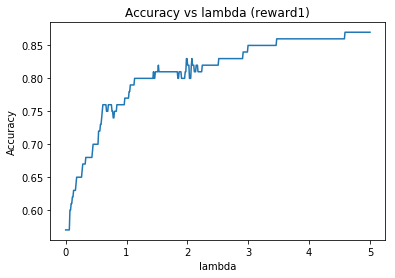

In [25]:
lambs = np.linspace(0, 5, num)
plt.plot(lambs, acc1)
plt.title('Accuracy vs lambda (reward1)')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.show()

# Question 12

In [26]:
lambda_max1 = lambs[acc1.index(max(acc1))]
print "max:", max(acc1)
print "lambda_max (reward1):", lambda_max1

max: 0.87
lambda_max (reward1): 4.589178356713426


# Question 13

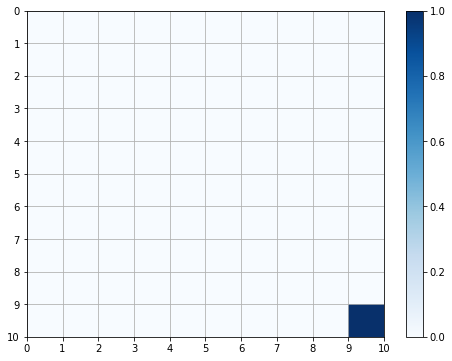

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.1592e-01 -0.0000e+00  5e+02  1e+01  1e+00  7e-01
 2: -1.9383e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.4994e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 4: -3.6798e-01 -0.0000e+00  3e+02  4e+00  4e-01  5e-01
 5: -1.2545e+00 -0.0000e+00  1e+03  5e+00  5e-01  1e+00
 6: -3.8057e+00 -0.0000e+00  3e+03  4e+00  4e-01  4e+00
 7: -1.7858e+02 -0.0000e+00  1e+05  4e+00  4e-01  2e+02
 8: -1.7850e+04 -0.0000e+00  1e+07  4e+00  4e-01  2e+04
 9: -1.7850e+06 -0.0000e+00  1e+09  4e+00  4e-01  2e+06
10: -1.7850e+08 -0.0000e+00  1e+11  4e+00  4e-01  2e+08
Certificate of dual infeasibility found.


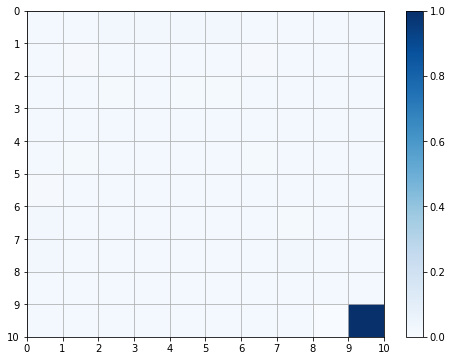

In [27]:
draw_heatmap(reward1)
pred_reward1 = IRL_LP(trans_prob, np.reshape(E1, [-1, 1]), discount, lambda_max1, reward1.max())
pred_reward1 = np.reshape(pred_reward1, (10, 10))
draw_heatmap(pred_reward1)

# Question 14

optimal state values:
[[0.17845112 0.20178616 0.22193698 0.25134631 0.28829027 0.33015221
  0.39418344 0.48119064 0.58954665 0.70433237]
 [0.17481886 0.19739835 0.23178752 0.27416542 0.32508184 0.39044143
  0.48014842 0.58974846 0.72888473 0.87810039]
 [0.20158528 0.23122871 0.27354278 0.32809621 0.3964899  0.48214487
  0.59271251 0.73182682 0.90899647 1.10400988]
 [0.23784818 0.27457251 0.32883417 0.39775215 0.48620259 0.5970343
  0.73524468 0.91209403 1.13866144 1.39368354]
 [0.27860425 0.33383788 0.39890324 0.48639174 0.59801885 0.74085381
  0.92114277 1.14276775 1.43134065 1.76484315]
 [0.34221537 0.39908016 0.48546606 0.59798009 0.74094538 0.92139617
  1.14750912 1.43395398 1.80432183 2.24093949]
 [0.40039006 0.48303544 0.59365731 0.73596683 0.91714791 1.14754879
  1.43695138 1.81281874 2.27963367 2.8515355 ]
 [0.4804138  0.59132556 0.73238292 0.9133544  1.14367657 1.43670642
  1.81285361 2.28087145 2.88559688 3.63526903]
 [0.58938021 0.72776442 0.90769265 1.13786899 1.43115342 1.

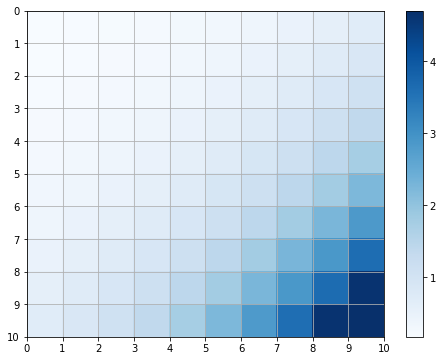

In [28]:
# reward1
(v_ex1, E_ex1) = value_iteration(ST, AT, discount, pred_reward1)
print 'optimal state values:'
print v_ex1
print
print "optimal state values heat map (extracted reward1)"
draw_heatmap(v_ex1)

# Question 16

optimal policy of the agent:
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]

optimal action (extracted reward1):


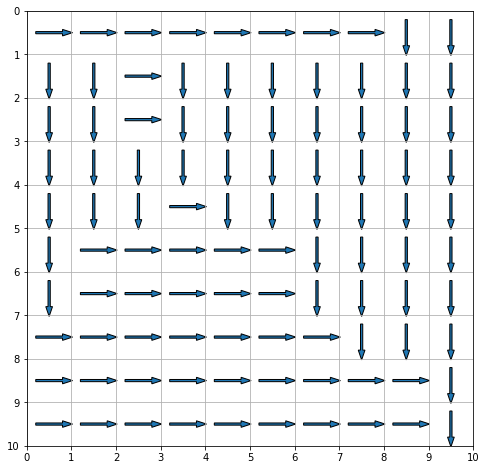

In [29]:
# reward1
print 'optimal policy of the agent:'
print E_ex1
print
print "optimal action (extracted reward1):"
draw_arrow(E_ex1)

# Question 18

0.0
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -3.1432e+00 -0.0000e+00  2e+03  2e+01  1e+01  4e+00
 2: -7.4524e+00 -0.0000e+00  4e+03  3e+01  1e+01  8e+00
 3: -8.2492e+01 -0.0000e+00  7e+04  3e+01  2e+01  8e+01
 4: -8.1147e+03 -0.0000e+00  7e+06  3e+01  2e+01  8e+03
 5: -8.1131e+05 -0.0000e+00  7e+08  3e+01  2e+01  8e+05
 6: -8.1131e+07 -0.0000e+00  7e+10  3e+01  2e+01  8e+07
 7: -8.1131e+09 -0.0000e+00  7e+12  3e+01  2e+01  8e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 2.]
 [1. 1. 1. 1. 2. 2. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 2. 3. 1.]
 [1. 1. 1. 1. 2. 1. 2. 2. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 3. 1.]
 [0. 0. 0. 2. 2. 2. 2. 2. 3. 1.]
 [0. 0. 0. 0. 0. 0. 0. 3. 3. 1.]]
0.01002004008016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01

[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 2.]
 [1. 1. 1. 1. 2. 2. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 2. 3. 1.]
 [1. 1. 1. 1. 2. 1. 2. 2. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 3. 1.]
 [0. 0. 0. 2. 2. 2. 2. 2. 3. 1.]
 [0. 0. 0. 0. 0. 0. 0. 3. 3. 1.]]
0.1002004008016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.8736e+00 -0.0000e+00  1e+03  2e+01  1e+01  4e+00
 2: -6.4587e+00 -0.0000e+00  3e+03  2e+01  1e+01  7e+00
 3: -3.5149e+01 -0.0000e+00  2e+04  2e+01  1e+01  4e+01
 4: -3.1835e+03 -0.0000e+00  2e+06  2e+01  1e+01  3e+03
 5: -3.1823e+05 -0.0000e+00  2e+08  2e+01  1e+01  3e+05
 6: -3.1822e+07 -0.0000e+00  2e+10  2e+01  1e+01  3e+07
 7: -3.1822e+09 -0.0000e+00  2e+12  2e+01  1e+01  3e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 2.]
 [1. 1. 1. 1. 2. 2. 0. 0. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 2. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 2. 2. 2. 3. 3. 1.]
 [0. 0. 0. 0. 0. 0. 3. 3. 3. 1.]]
0.2004008016032064
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.6903e+00 -0.0000e+00  8e+02  2e+01  9e+00  3e+00
 2: -5.4151e+00 -0.0000e+00  2e+03  2e+01  9e+00  6e+00
 3: -2.1158e+01 -0.0000e+00  9e+03  2e+01  9e+00  2e+01
 4: -1.5261e+03 -0.0000e+00  8e+05  2e+01  1e+01  2e+03
 5: -1.5248e+05 -0.0000e+00  8e+07  2e+01  1e+01  2e+05
 6: -1.5247e+07 -0.0000e+00  8e+09  2e+01  1e+01  2e+07
 7: -1.5247e+09 -0.0000e+00  8e+11  2e+01  1e+01  2e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 2. 2. 3. 3. 3. 1.]
 [0. 0. 0. 0. 0. 0. 3. 3. 3. 1.]]
0.3006012024048096
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5256e+00 -0.0000e+00  6e+02  1e+01  8e+00  3e+00
 2: -5.0434e+00 -0.0000e+00  1e+03  2e+01  8e+00  6e+00
 3: -1.5366e+01 -0.0000e+00  6e+03  2e+01  9e+00  2e+01
 4: -7.4509e+02 -0.0000e+00  3e+05  2e+01  9e+00  7e+02
 5: -7.4357e+04 -0.0000e+00  3e+07  2e+01  9e+00  7e+04
 6: -7.4355e+06 -0.0000e+00  3e+09  2e+01  9e+00  7e+06
 7: -7.4355e+08 -0.0000e+00  3e+11  2e+01  9e+00  7e+08
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 2. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 0. 3. 3. 3. 3. 3. 1.]]
0.4008016032064128
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.5421e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -4.7379e+00 -0.0000e+00  9e+02  1e+01  7e+00  5e+00
 3: -1.7517e+01 -0.0000e+00  6e+03  2e+01  9e+00  2e+01
 4: -5.0877e+02 -0.0000e+00  2e+05  2e+01  8e+00  5e+02
 5: -5.0674e+04 -0.0000e+00  2e+07  2e+01  8e+00  5e+04
 6: -5.0672e+06 -0.0000e+00  2e+09  2e+01  8e+00  5e+06
 7: -5.0672e+08 -0.0000e+00  2e+11  2e+01  8e+00  5e+08
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 0. 3. 3. 3. 3. 3. 1.]]
0.501002004008016
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.4361e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -4.2444e+00 -0.0000e+00  7e+02  1e+01  6e+00  5e+00
 3: -1.3154e+01 -0.0000e+00  4e+03  2e+01  8e+00  1e+01
 4: -2.3167e+02 -0.0000e+00  6e+04  1e+01  6e+00  2e+02
 5: -2.3031e+04 -0.0000e+00  6e+06  1e+01  6e+00  2e+04
 6: -2.3030e+06 -0.0000e+00  6e+08  1e+01  6e+00  2e+06
 7: -2.3030e+08 -0.0000e+00  6e+10  1e+01  6e+00  2e+08
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 1. 1.]
 [1. 1. 1

[[1. 1. 3. 0. 2. 3. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]
0.5911823647294588
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.1263e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -3.3141e+00 -0.0000e+00  6e+02  1e+01  6e+00  4e+00
 3: -7.7222e+00 -0.0000e+00  2e+03  1e+01  7e+00  8e+00
 4: -6.8247e+01 -0.0000e+00  2e+04  1e+01  6e+00  7e+01
 5: -6.5517e+03 -0.0000e+00  2e+06  1e+01  6e+00  7e+03
 6: -6.5505e+05 -0.0000e+00  2e+08  1e+01  6e+00  7e+05
 7: -6.5505e+07 -0.0000e+00  2e+10  1e+01  6e+00  7e+07
 8: -6.5505e+09 -0.0000e+00  2e+12  1e+01  6e+00  7e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 1. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]
0.6813627254509018
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.8774e+00 -0.0000e+00  5e+02  2e+01  7e+00  2e+00
 2: -2.8977e+00 -0.0000e+00  5e+02  1e+01  5e+00  3e+00
 3: -5.7588e+00 -0.0000e+00  1e+03  1e+01  6e+00  6e+00
 4: -3.2821e+01 -0.0000e+00  9e+03  1e+01  6e+00  3e+01
 5: -2.6365e+03 -0.0000e+00  8e+05  1e+01  6e+00  3e+03
 6: -2.6348e+05 -0.0000e+00  8e+07  1e+01  6e+00  3e+05
 7: -2.6348e+07 -0.0000e+00  8e+09  1e+01  6e+00  3e+07
 8: -2.6348e+09 -0.0000e+00  8e+11  1e+01  6e+00  3e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]
0.7715430861723447
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.6721e+00 -0.0000e+00  5e+02  2e+01  7e+00  2e+00
 2: -2.6453e+00 -0.0000e+00  4e+02  1e+01  5e+00  3e+00
 3: -5.6211e+00 -0.0000e+00  1e+03  1e+01  5e+00  6e+00
 4: -2.3954e+01 -0.0000e+00  6e+03  1e+01  6e+00  2e+01
 5: -1.6605e+03 -0.0000e+00  5e+05  1e+01  6e+00  2e+03
 6: -1.6591e+05 -0.0000e+00  5e+07  1e+01  6e+00  2e+05
 7: -1.6591e+07 -0.0000e+00  5e+09  1e+01  6e+00  2e+07
 8: -1.6591e+09 -0.0000e+00  5e+11  1e+01  6e+00  2e+09
Certificate of dual infeasibility found.
[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.8617234468937875
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.4999e+00 -0.0000e+00  5e+02  2e+01  7e+00  2e+00
 2: -2.3023e+00 -0.0000e+00  4e+02  1e+01  4e+00  3e+00
 3: -4.8659e+00 -0.0000e+00  9e+02  1e+01  5e+00  5e+00
 4: -1.5578e+01 -0.0000e+00  4e+03  1e+01  5e+00  2e+01
 5: -5.8674e+02 -0.0000e+00  2e+05  1e+01  5e+00  6e+02
 6: -5.8564e+04 -0.0000e+00  2e+07  1e+01  5e+00  6e+04
 7: -5.8563e+06 -0.0000e+00  2e+09  1e+01  5e+00  6e+06
 8: -5.8563e+08 -0.0000e+00  2e+11  1e+01  5e+00  6e+08
Certificate of dual infeasibility found.
[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.9519038076152304
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.3536e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -2.0309e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 3: -4.2534e+00 -0.0000e+00  8e+02  1e+01  5e+00  5e+00
 4: -1.1037e+01 -0.0000e+00  3e+03  1e+01  5e+00  1e+01
 5: -2.1477e+02 -0.0000e+00  5e+04  1e+01  4e+00  2e+02
 6: -2.1366e+04 -0.0000e+00  5e+06  1e+01  4e+00  2e+04
 7: -2.1366e+06 -0.0000e+00  5e+08  1e+01  4e+00  2e+06
 8: -2.1366e+08 -0.0000e+00  5e+10  1e+01  4e+00  2e+08
Certificate of dual infeasibility found.
[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.0420841683366733
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.2281e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -1.8043e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 3: -3.9726e+00 -0.0000e+00  8e+02  1e+01  5e+00  4e+00
 4: -9.2827e+00 -0.0000e+00  3e+03  1e+01  5e+00  1e+01
 5: -1.4159e+02 -0.0000e+00  4e+04  9e+00  4e+00  1e+02
 6: -1.4041e+04 -0.0000e+00  4e+06  9e+00  4e+00  1e+04
 7: -1.4040e+06 -0.0000e+00  4e+08  9e+00  4e+00  1e+06
 8: -1.4040e+08 -0.0000e+00  4e+10  9e+00  4e+00  1e+08
Certificate of dual infeasibility found.
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.1322645290581161
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.1195e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -1.6095e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 3: -3.8269e+00 -0.0000e+00  8e+02  1e+01  4e+00  4e+00
 4: -8.1737e+00 -0.0000e+00  2e+03  1e+01  4e+00  9e+00
 5: -1.1084e+02 -0.0000e+00  3e+04  9e+00  3e+00  1e+02
 6: -1.0964e+04 -0.0000e+00  3e+06  9e+00  3e+00  1e+04
 7: -1.0964e+06 -0.0000e+00  3e+08  9e+00  3e+00  1e+06
 8: -1.0964e+08 -0.0000e+00  3e+10  9e+00  3e+00  1e+08
Certificate of dual infeasibility found.
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.222444889779559
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.0249e+00 -0.0000e+00  5e+02  2e+01  5e+00  2e+00
 2: -1.4401e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 3: -3.7636e+00 -0.0000e+00  9e+02  1e+01  4e+00  4e+00
 4: -7.3335e+00 -0.0000e+00  2e+03  1e+01  4e+00  8e+00
 5: -9.3670e+01 -0.0000e+00  3e+04  9e+00  3e+00  9e+01
 6: -9.2479e+03 -0.0000e+00  3e+06  9e+00  3e+00  9e+03
 7: -9.2476e+05 -0.0000e+00  3e+08  9e+00  3e+00  9e+05
 8: -9.2476e+07 -0.0000e+00  3e+10  9e+00  3e+00  9e+07
Certificate of dual infeasibility found.
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3.

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.3126252505010019
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -9.4190e-01 -0.0000e+00  5e+02  2e+01  5e+00  1e+00
 2: -1.2922e+00 -0.0000e+00  2e+02  8e+00  3e+00  2e+00
 3: -3.7593e+00 -0.0000e+00  1e+03  1e+01  4e+00  4e+00
 4: -6.6452e+00 -0.0000e+00  2e+03  1e+01  4e+00  7e+00
 5: -8.2652e+01 -0.0000e+00  2e+04  8e+00  3e+00  8e+01
 6: -8.1457e+03 -0.0000e+00  2e+06  8e+00  3e+00  8e+03
 7: -8.1455e+05 -0.0000e+00  2e+08  8e+00  3e+00  8e+05
 8: -8.1455e+07 -0.0000e+00  2e+10  8e+00  3e+00  8e+07
 9: -8.1455e+09 -0.0000e+00  2e+12  8e+00  3e+00  8e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.4028056112224447
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -8.6874e-01 -0.0000e+00  5e+02  2e+01  5e+00  1e+00
 2: -1.1627e+00 -0.0000e+00  2e+02  8e+00  2e+00  1e+00
 3: -3.7970e+00 -0.0000e+00  1e+03  1e+01  4e+00  4e+00
 4: -6.0565e+00 -0.0000e+00  2e+03  1e+01  4e+00  6e+00
 5: -7.5122e+01 -0.0000e+00  2e+04  8e+00  3e+00  8e+01
 6: -7.3918e+03 -0.0000e+00  2e+06  8e+00  3e+00  7e+03
 7: -7.3916e+05 -0.0000e+00  2e+08  8e+00  3e+00  7e+05
 8: -7.3916e+07 -0.0000e+00  2e+10  8e+00  3e+00  7e+07
 9: -7.3916e+09 -0.0000e+00  2e+12  8e+00  3e+00  7e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.4929859719438878
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -8.0387e-01 -0.0000e+00  5e+02  2e+01  5e+00  1e+00
 2: -1.0491e+00 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.8574e+00 -0.0000e+00  1e+03  1e+01  4e+00  4e+00
 4: -5.5334e+00 -0.0000e+00  2e+03  1e+01  3e+00  6e+00
 5: -6.9922e+01 -0.0000e+00  2e+04  8e+00  2e+00  7e+01
 6: -6.8719e+03 -0.0000e+00  2e+06  8e+00  2e+00  7e+03
 7: -6.8718e+05 -0.0000e+00  2e+08  8e+00  2e+00  7e+05
 8: -6.8718e+07 -0.0000e+00  2e+10  8e+00  2e+00  7e+07
 9: -6.8718e+09 -0.0000e+00  2e+12  8e+00  2e+00  7e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.5831663326653307
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -7.4608e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -9.4825e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.8907e+00 -0.0000e+00  1e+03  2e+01  5e+00  4e+00
 4: -5.0310e+00 -0.0000e+00  2e+03  1e+01  3e+00  5e+00
 5: -6.6152e+01 -0.0000e+00  2e+04  7e+00  2e+00  7e+01
 6: -6.4995e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -6.4995e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -6.4995e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -6.4995e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.6733466933867736
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -6.9436e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -8.5365e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.7180e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -4.5072e+00 -0.0000e+00  2e+03  9e+00  3e+00  5e+00
 5: -6.2200e+01 -0.0000e+00  2e+04  7e+00  2e+00  6e+01
 6: -6.1150e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -6.1150e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -6.1150e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -6.1150e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.7635270541082164
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -6.4786e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -7.7226e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.5699e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -4.0340e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -5.7107e+01 -0.0000e+00  2e+04  7e+00  2e+00  6e+01
 6: -5.6115e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -5.6115e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -5.6115e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -5.6115e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.8537074148296593
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -6.0590e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -7.0183e-01 -0.0000e+00  2e+02  7e+00  2e+00  9e-01
 3: -3.3790e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -3.6898e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -5.2164e+01 -0.0000e+00  2e+04  7e+00  2e+00  5e+01
 6: -5.1218e+03 -0.0000e+00  2e+06  7e+00  2e+00  5e+03
 7: -5.1218e+05 -0.0000e+00  2e+08  7e+00  2e+00  5e+05
 8: -5.1218e+07 -0.0000e+00  2e+10  7e+00  2e+00  5e+07
 9: -5.1218e+09 -0.0000e+00  2e+12  7e+00  2e+00  5e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.9438877755511021
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -5.6789e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -6.4053e-01 -0.0000e+00  2e+02  6e+00  2e+00  9e-01
 3: -3.0413e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -3.6214e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -4.4421e+01 -0.0000e+00  2e+04  6e+00  2e+00  4e+01
 6: -4.3213e+03 -0.0000e+00  2e+06  6e+00  2e+00  4e+03
 7: -4.3213e+05 -0.0000e+00  2e+08  6e+00  2e+00  4e+05
 8: -4.3213e+07 -0.0000e+00  2e+10  6e+00  2e+00  4e+07
 9: -4.3213e+09 -0.0000e+00  2e+12  6e+00  2e+00  4e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.034068136272545
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -5.3334e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -5.8690e-01 -0.0000e+00  2e+02  6e+00  2e+00  8e-01
 3: -2.7420e+00 -0.0000e+00  1e+03  1e+01  4e+00  3e+00
 4: -3.4500e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -3.2436e+01 -0.0000e+00  1e+04  7e+00  2e+00  3e+01
 6: -3.1328e+03 -0.0000e+00  1e+06  7e+00  2e+00  3e+03
 7: -3.1328e+05 -0.0000e+00  1e+08  7e+00  2e+00  3e+05
 8: -3.1328e+07 -0.0000e+00  1e+10  7e+00  2e+00  3e+07
 9: -3.1328e+09 -0.0000e+00  1e+12  7e+00  2e+00  3e+09
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.124248496993988
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -5.0184e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -5.3975e-01 -0.0000e+00  2e+02  6e+00  1e+00  8e-01
 3: -2.4771e+00 -0.0000e+00  1e+03  1e+01  3e+00  3e+00
 4: -3.2163e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -1.9972e+01 -0.0000e+00  9e+03  7e+00  2e+00  2e+01
 6: -1.8477e+03 -0.0000e+00  8e+05  7e+00  2e+00  2e+03
 7: -1.8476e+05 -0.0000e+00  8e+07  7e+00  2e+00  2e+05
 8: -1.8476e+07 -0.0000e+00  8e+09  7e+00  2e+00  2e+07
 9: -1.8476e+09 -0.0000e+00  8e+11  7e+00  2e+00  2e+09
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.214428857715431
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.7301e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -4.9809e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -2.1270e+00 -0.0000e+00  1e+03  1e+01  3e+00  3e+00
 4: -2.9007e+00 -0.0000e+00  2e+03  1e+01  2e+00  3e+00
 5: -1.1122e+01 -0.0000e+00  6e+03  7e+00  2e+00  1e+01
 6: -7.6601e+02 -0.0000e+00  4e+05  7e+00  2e+00  8e+02
 7: -7.6593e+04 -0.0000e+00  4e+07  7e+00  2e+00  8e+04
 8: -7.6593e+06 -0.0000e+00  4e+09  7e+00  2e+00  8e+06
 9: -7.6593e+08 -0.0000e+00  4e+11  7e+00  2e+00  8e+08
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.3046092184368736
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.4657e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.6113e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -1.6981e+00 -0.0000e+00  9e+02  1e+01  3e+00  2e+00
 4: -2.5248e+00 -0.0000e+00  1e+03  9e+00  2e+00  3e+00
 5: -6.9713e+00 -0.0000e+00  4e+03  8e+00  2e+00  7e+00
 6: -2.1778e+02 -0.0000e+00  9e+04  6e+00  1e+00  2e+02
 7: -2.1763e+04 -0.0000e+00  9e+06  6e+00  1e+00  2e+04
 8: -2.1763e+06 -0.0000e+00  9e+08  6e+00  1e+00  2e+06
 9: -2.1763e+08 -0.0000e+00  9e+10  6e+00  1e+00  2e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.3947895791583167
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.2232e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.2824e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.4014e+00 -0.0000e+00  7e+02  1e+01  2e+00  2e+00
 4: -2.2113e+00 -0.0000e+00  1e+03  9e+00  2e+00  3e+00
 5: -5.6205e+00 -0.0000e+00  3e+03  7e+00  2e+00  6e+00
 6: -1.3743e+02 -0.0000e+00  6e+04  6e+00  1e+00  1e+02
 7: -1.3719e+04 -0.0000e+00  6e+06  6e+00  1e+00  1e+04
 8: -1.3720e+06 -0.0000e+00  6e+08  6e+00  1e+00  1e+06
 9: -1.3720e+08 -0.0000e+00  6e+10  6e+00  1e+00  1e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.4849699398797593
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.0506e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.0264e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.1924e+00 -0.0000e+00  6e+02  1e+01  2e+00  2e+00
 4: -1.9998e+00 -0.0000e+00  1e+03  8e+00  2e+00  2e+00
 5: -4.9175e+00 -0.0000e+00  3e+03  7e+00  1e+00  5e+00
 6: -1.1551e+02 -0.0000e+00  5e+04  5e+00  1e+00  1e+02
 7: -1.1523e+04 -0.0000e+00  5e+06  5e+00  1e+00  1e+04
 8: -1.1523e+06 -0.0000e+00  5e+08  5e+00  1e+00  1e+06
 9: -1.1523e+08 -0.0000e+00  5e+10  5e+00  1e+00  1e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.5751503006012024
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -3.8906e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -3.7947e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.0326e+00 -0.0000e+00  5e+02  9e+00  2e+00  1e+00
 4: -1.7300e+00 -0.0000e+00  9e+02  8e+00  2e+00  2e+00
 5: -3.9922e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -7.2851e+01 -0.0000e+00  3e+04  5e+00  1e+00  7e+01
 7: -7.2410e+03 -0.0000e+00  3e+06  5e+00  1e+00  7e+03
 8: -7.2411e+05 -0.0000e+00  3e+08  5e+00  1e+00  7e+05
 9: -7.2411e+07 -0.0000e+00  3e+10  5e+00  1e+00  7e+07
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.665330661322645
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -3.7420e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -3.5844e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -9.0670e-01 -0.0000e+00  5e+02  8e+00  2e+00  1e+00
 4: -1.5029e+00 -0.0000e+00  8e+02  8e+00  1e+00  2e+00
 5: -3.7178e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -4.5562e+01 -0.0000e+00  2e+04  5e+00  1e+00  5e+01
 7: -4.4753e+03 -0.0000e+00  2e+06  5e+00  1e+00  4e+03
 8: -4.4753e+05 -0.0000e+00  2e+08  5e+00  1e+00  4e+05
 9: -4.4753e+07 -0.0000e+00  2e+10  5e+00  1e+00  4e+07
10: -4.4753e+09 -0.0000e+00  2e+12  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.7454909819639277
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.6187e-01 -0.0000e+00  5e+02  1e+01  3e+00  8e-01
 2: -3.4132e-01 -0.0000e+00  2e+02  5e+00  1e+00  5e-01
 3: -8.1543e-01 -0.0000e+00  4e+02  8e+00  2e+00  1e+00
 4: -1.3426e+00 -0.0000e+00  7e+02  7e+00  1e+00  2e+00
 5: -3.7843e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -2.7847e+01 -0.0000e+00  1e+04  5e+00  1e+00  3e+01
 7: -2.6219e+03 -0.0000e+00  1e+06  5e+00  1e+00  3e+03
 8: -2.6219e+05 -0.0000e+00  1e+08  5e+00  1e+00  3e+05
 9: -2.6219e+07 -0.0000e+00  1e+10  5e+00  1e+00  3e+07
10: -2.6219e+09 -0.0000e+00  1e+12  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.8256513026052104
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.5030e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.2555e-01 -0.0000e+00  2e+02  5e+00  1e+00  5e-01
 3: -7.3882e-01 -0.0000e+00  4e+02  8e+00  1e+00  1e+00
 4: -1.2098e+00 -0.0000e+00  6e+02  7e+00  1e+00  1e+00
 5: -3.2482e+00 -0.0000e+00  2e+03  7e+00  1e+00  3e+00
 6: -2.7000e+01 -0.0000e+00  1e+04  5e+00  9e-01  3e+01
 7: -2.5438e+03 -0.0000e+00  1e+06  5e+00  9e-01  3e+03
 8: -2.5438e+05 -0.0000e+00  1e+08  5e+00  9e-01  3e+05
 9: -2.5438e+07 -0.0000e+00  1e+10  5e+00  9e-01  3e+07
10: -2.5438e+09 -0.0000e+00  1e+12  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.905811623246493
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.3943e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.1097e-01 -0.0000e+00  2e+02  5e+00  1e+00  5e-01
 3: -6.7368e-01 -0.0000e+00  4e+02  7e+00  1e+00  9e-01
 4: -1.0979e+00 -0.0000e+00  6e+02  7e+00  1e+00  1e+00
 5: -2.7808e+00 -0.0000e+00  2e+03  7e+00  1e+00  3e+00
 6: -2.0605e+01 -0.0000e+00  9e+03  5e+00  9e-01  2e+01
 7: -1.9090e+03 -0.0000e+00  9e+05  5e+00  9e-01  2e+03
 8: -1.9091e+05 -0.0000e+00  9e+07  5e+00  9e-01  2e+05
 9: -1.9091e+07 -0.0000e+00  9e+09  5e+00  9e-01  2e+07
10: -1.9091e+09 -0.0000e+00  9e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.9859719438877756
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.2922e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.9747e-01 -0.0000e+00  2e+02  5e+00  9e-01  5e-01
 3: -6.1767e-01 -0.0000e+00  3e+02  7e+00  1e+00  9e-01
 4: -1.0021e+00 -0.0000e+00  5e+02  7e+00  1e+00  1e+00
 5: -2.4644e+00 -0.0000e+00  1e+03  7e+00  1e+00  3e+00
 6: -1.5649e+01 -0.0000e+00  8e+03  5e+00  8e-01  2e+01
 7: -1.4665e+03 -0.0000e+00  7e+05  5e+00  8e-01  1e+03
 8: -1.4665e+05 -0.0000e+00  7e+07  5e+00  8e-01  1e+05
 9: -1.4665e+07 -0.0000e+00  7e+09  5e+00  8e-01  1e+07
10: -1.4665e+09 -0.0000e+00  7e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.066132264529058
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.1960e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.8496e-01 -0.0000e+00  2e+02  5e+00  9e-01  5e-01
 3: -5.6903e-01 -0.0000e+00  3e+02  7e+00  1e+00  8e-01
 4: -9.1904e-01 -0.0000e+00  5e+02  7e+00  1e+00  1e+00
 5: -2.1500e+00 -0.0000e+00  1e+03  7e+00  1e+00  2e+00
 6: -9.8183e+00 -0.0000e+00  5e+03  5e+00  9e-01  1e+01
 7: -8.1937e+02 -0.0000e+00  4e+05  5e+00  9e-01  8e+02
 8: -8.1938e+04 -0.0000e+00  4e+07  5e+00  9e-01  8e+04
 9: -8.1938e+06 -0.0000e+00  4e+09  5e+00  9e-01  8e+06
10: -8.1938e+08 -0.0000e+00  4e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.1462925851703405
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.1054e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.7333e-01 -0.0000e+00  1e+02  5e+00  8e-01  5e-01
 3: -5.2643e-01 -0.0000e+00  3e+02  6e+00  1e+00  8e-01
 4: -8.4632e-01 -0.0000e+00  5e+02  6e+00  1e+00  1e+00
 5: -1.9314e+00 -0.0000e+00  1e+03  7e+00  1e+00  2e+00
 6: -7.4642e+00 -0.0000e+00  4e+03  5e+00  9e-01  8e+00
 7: -5.2381e+02 -0.0000e+00  3e+05  5e+00  9e-01  5e+02
 8: -5.2381e+04 -0.0000e+00  3e+07  5e+00  9e-01  5e+04
 9: -5.2381e+06 -0.0000e+00  3e+09  5e+00  9e-01  5e+06
10: -5.2381e+08 -0.0000e+00  3e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.226452905811623
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.0199e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.6251e-01 -0.0000e+00  1e+02  5e+00  8e-01  4e-01
 3: -4.8885e-01 -0.0000e+00  3e+02  6e+00  1e+00  7e-01
 4: -7.8208e-01 -0.0000e+00  4e+02  6e+00  1e+00  1e+00
 5: -1.7651e+00 -0.0000e+00  1e+03  6e+00  1e+00  2e+00
 6: -6.1322e+00 -0.0000e+00  4e+03  5e+00  9e-01  6e+00
 7: -3.5262e+02 -0.0000e+00  2e+05  5e+00  8e-01  4e+02
 8: -3.5260e+04 -0.0000e+00  2e+07  5e+00  8e-01  4e+04
 9: -3.5260e+06 -0.0000e+00  2e+09  5e+00  8e-01  4e+06
10: -3.5260e+08 -0.0000e+00  2e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.306613226452906
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -2.9393e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.5242e-01 -0.0000e+00  1e+02  5e+00  8e-01  4e-01
 3: -4.5547e-01 -0.0000e+00  3e+02  6e+00  1e+00  7e-01
 4: -7.2490e-01 -0.0000e+00  4e+02  6e+00  1e+00  9e-01
 5: -1.6342e+00 -0.0000e+00  1e+03  6e+00  1e+00  2e+00
 6: -5.2643e+00 -0.0000e+00  3e+03  5e+00  8e-01  5e+00
 7: -2.5557e+02 -0.0000e+00  1e+05  5e+00  7e-01  3e+02
 8: -2.5552e+04 -0.0000e+00  1e+07  5e+00  7e-01  3e+04
 9: -2.5552e+06 -0.0000e+00  1e+09  5e+00  7e-01  3e+06
10: -2.5552e+08 -0.0000e+00  1e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.3867735470941884
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -2.8632e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.4299e-01 -0.0000e+00  1e+02  5e+00  8e-01  4e-01
 3: -4.2563e-01 -0.0000e+00  3e+02  6e+00  9e-01  6e-01
 4: -6.7365e-01 -0.0000e+00  4e+02  6e+00  9e-01  9e-01
 5: -1.5274e+00 -0.0000e+00  1e+03  6e+00  1e+00  2e+00
 6: -4.5851e+00 -0.0000e+00  3e+03  5e+00  8e-01  5e+00
 7: -1.9364e+02 -0.0000e+00  1e+05  4e+00  7e-01  2e+02
 8: -1.9356e+04 -0.0000e+00  1e+07  4e+00  7e-01  2e+04
 9: -1.9356e+06 -0.0000e+00  1e+09  4e+00  7e-01  2e+06
10: -1.9356e+08 -0.0000e+00  1e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.4669338677354706
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.7912e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.3418e-01 -0.0000e+00  1e+02  5e+00  7e-01  4e-01
 3: -3.9882e-01 -0.0000e+00  2e+02  6e+00  9e-01  6e-01
 4: -6.2747e-01 -0.0000e+00  4e+02  6e+00  9e-01  8e-01
 5: -1.4381e+00 -0.0000e+00  1e+03  6e+00  9e-01  2e+00
 6: -4.0450e+00 -0.0000e+00  3e+03  5e+00  8e-01  4e+00
 7: -1.5404e+02 -0.0000e+00  9e+04  4e+00  7e-01  2e+02
 8: -1.5394e+04 -0.0000e+00  9e+06  4e+00  7e-01  2e+04
 9: -1.5394e+06 -0.0000e+00  9e+08  4e+00  7e-01  2e+06
10: -1.5394e+08 -0.0000e+00  9e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.5470941883767533
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.7231e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.2593e-01 -0.0000e+00  1e+02  5e+00  7e-01  4e-01
 3: -3.7461e-01 -0.0000e+00  2e+02  5e+00  8e-01  6e-01
 4: -5.8562e-01 -0.0000e+00  4e+02  6e+00  8e-01  8e-01
 5: -1.3619e+00 -0.0000e+00  1e+03  6e+00  9e-01  2e+00
 6: -3.6277e+00 -0.0000e+00  3e+03  5e+00  8e-01  4e+00
 7: -1.2899e+02 -0.0000e+00  7e+04  4e+00  6e-01  1e+02
 8: -1.2887e+04 -0.0000e+00  7e+06  4e+00  6e-01  1e+04
 9: -1.2887e+06 -0.0000e+00  7e+08  4e+00  6e-01  1e+06
10: -1.2887e+08 -0.0000e+00  7e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.627254509018036
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.6587e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.1819e-01 -0.0000e+00  1e+02  5e+00  7e-01  4e-01
 3: -3.5265e-01 -0.0000e+00  2e+02  5e+00  8e-01  5e-01
 4: -5.4754e-01 -0.0000e+00  3e+02  5e+00  8e-01  7e-01
 5: -1.2961e+00 -0.0000e+00  9e+02  6e+00  9e-01  2e+00
 6: -3.2907e+00 -0.0000e+00  2e+03  5e+00  7e-01  3e+00
 7: -1.1262e+02 -0.0000e+00  7e+04  4e+00  6e-01  1e+02
 8: -1.1249e+04 -0.0000e+00  7e+06  4e+00  6e-01  1e+04
 9: -1.1249e+06 -0.0000e+00  7e+08  4e+00  6e-01  1e+06
10: -1.1249e+08 -0.0000e+00  7e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.7074148296593186
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.5977e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.1093e-01 -0.0000e+00  1e+02  4e+00  6e-01  4e-01
 3: -3.3265e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 4: -5.1272e-01 -0.0000e+00  3e+02  5e+00  8e-01  7e-01
 5: -1.2386e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -3.0093e+00 -0.0000e+00  2e+03  5e+00  7e-01  3e+00
 7: -9.8065e+01 -0.0000e+00  6e+04  4e+00  6e-01  1e+02
 8: -9.7914e+03 -0.0000e+00  6e+06  4e+00  6e-01  1e+04
 9: -9.7915e+05 -0.0000e+00  6e+08  4e+00  6e-01  1e+06
10: -9.7915e+07 -0.0000e+00  6e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.787575150300601
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.5399e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.0409e-01 -0.0000e+00  1e+02  4e+00  6e-01  4e-01
 3: -3.1436e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 4: -4.8078e-01 -0.0000e+00  3e+02  5e+00  7e-01  7e-01
 5: -1.1880e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -2.7682e+00 -0.0000e+00  2e+03  5e+00  7e-01  3e+00
 7: -8.3238e+01 -0.0000e+00  5e+04  4e+00  5e-01  8e+01
 8: -8.3066e+03 -0.0000e+00  5e+06  4e+00  5e-01  8e+03
 9: -8.3066e+05 -0.0000e+00  5e+08  4e+00  5e-01  8e+05
10: -8.3066e+07 -0.0000e+00  5e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.8677354709418834
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.4850e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.9766e-01 -0.0000e+00  1e+02  4e+00  6e-01  4e-01
 3: -2.9757e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 4: -4.5137e-01 -0.0000e+00  3e+02  5e+00  7e-01  6e-01
 5: -1.1432e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -2.5572e+00 -0.0000e+00  2e+03  5e+00  6e-01  3e+00
 7: -7.1118e+01 -0.0000e+00  5e+04  4e+00  5e-01  7e+01
 8: -7.0931e+03 -0.0000e+00  5e+06  4e+00  5e-01  7e+03
 9: -7.0932e+05 -0.0000e+00  5e+08  4e+00  5e-01  7e+05
10: -7.0932e+07 -0.0000e+00  5e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.947895791583166
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.4330e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.9159e-01 -0.0000e+00  1e+02  4e+00  6e-01  3e-01
 3: -2.8212e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 4: -4.2422e-01 -0.0000e+00  3e+02  5e+00  6e-01  6e-01
 5: -1.1034e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -2.3691e+00 -0.0000e+00  2e+03  4e+00  6e-01  3e+00
 7: -5.9172e+01 -0.0000e+00  4e+04  4e+00  5e-01  6e+01
 8: -5.8977e+03 -0.0000e+00  4e+06  4e+00  5e-01  6e+03
 9: -5.8977e+05 -0.0000e+00  4e+08  4e+00  5e-01  6e+05
10: -5.8977e+07 -0.0000e+00  4e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.028056112224449
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.3836e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.8586e-01 -0.0000e+00  1e+02  4e+00  6e-01  3e-01
 3: -2.6785e-01 -0.0000e+00  2e+02  4e+00  6e-01  4e-01
 4: -3.9907e-01 -0.0000e+00  3e+02  5e+00  6e-01  6e-01
 5: -1.0679e+00 -0.0000e+00  9e+02  6e+00  7e-01  1e+00
 6: -2.1989e+00 -0.0000e+00  2e+03  4e+00  6e-01  2e+00
 7: -5.0207e+01 -0.0000e+00  3e+04  4e+00  5e-01  5e+01
 8: -5.0028e+03 -0.0000e+00  3e+06  4e+00  5e-01  5e+03
 9: -5.0029e+05 -0.0000e+00  3e+08  4e+00  5e-01  5e+05
10: -5.0029e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.108216432865731
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.3366e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.8045e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.5462e-01 -0.0000e+00  2e+02  4e+00  6e-01  4e-01
 4: -3.7571e-01 -0.0000e+00  3e+02  4e+00  6e-01  5e-01
 5: -1.0364e+00 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -2.0427e+00 -0.0000e+00  2e+03  4e+00  6e-01  2e+00
 7: -4.3261e+01 -0.0000e+00  3e+04  4e+00  5e-01  4e+01
 8: -4.3127e+03 -0.0000e+00  3e+06  4e+00  5e-01  4e+03
 9: -4.3127e+05 -0.0000e+00  3e+08  4e+00  5e-01  4e+05
10: -4.3127e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.188376753507014
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.2920e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.7533e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.4234e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 4: -3.5398e-01 -0.0000e+00  2e+02  4e+00  6e-01  5e-01
 5: -1.0083e+00 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -1.8977e+00 -0.0000e+00  2e+03  4e+00  5e-01  2e+00
 7: -3.7725e+01 -0.0000e+00  3e+04  4e+00  5e-01  4e+01
 8: -3.7570e+03 -0.0000e+00  3e+06  4e+00  5e-01  4e+03
 9: -3.7571e+05 -0.0000e+00  3e+08  4e+00  5e-01  4e+05
10: -3.7571e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.268537074148297
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.2496e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.7047e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.3090e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 4: -3.3371e-01 -0.0000e+00  2e+02  4e+00  5e-01  5e-01
 5: -9.8350e-01 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -1.7617e+00 -0.0000e+00  2e+03  4e+00  5e-01  2e+00
 7: -3.3198e+01 -0.0000e+00  3e+04  4e+00  4e-01  3e+01
 8: -3.3021e+03 -0.0000e+00  3e+06  4e+00  4e-01  3e+03
 9: -3.3021e+05 -0.0000e+00  3e+08  4e+00  4e-01  3e+05
10: -3.3021e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.348697394789579
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.2093e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.6587e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.2022e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 4: -3.1475e-01 -0.0000e+00  2e+02  4e+00  5e-01  5e-01
 5: -9.6165e-01 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -1.6332e+00 -0.0000e+00  1e+03  4e+00  5e-01  2e+00
 7: -2.9412e+01 -0.0000e+00  2e+04  3e+00  4e-01  3e+01
 8: -2.9219e+03 -0.0000e+00  2e+06  3e+00  4e-01  3e+03
 9: -2.9219e+05 -0.0000e+00  2e+08  3e+00  4e-01  3e+05
10: -2.9219e+07 -0.0000e+00  2e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.428857715430862
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.1709e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.6150e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.1021e-01 -0.0000e+00  2e+02  4e+00  5e-01  3e-01
 4: -2.9701e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 5: -9.4260e-01 -0.0000e+00  9e+02  5e+00  6e-01  1e+00
 6: -1.5108e+00 -0.0000e+00  1e+03  4e+00  5e-01  2e+00
 7: -2.6179e+01 -0.0000e+00  2e+04  3e+00  4e-01  3e+01
 8: -2.5980e+03 -0.0000e+00  2e+06  3e+00  4e-01  3e+03
 9: -2.5980e+05 -0.0000e+00  2e+08  3e+00  4e-01  3e+05
10: -2.5980e+07 -0.0000e+00  2e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.509018036072144
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.1344e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.5735e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -2.0083e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 4: -2.8036e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 5: -9.2621e-01 -0.0000e+00  9e+02  5e+00  6e-01  1e+00
 6: -1.3939e+00 -0.0000e+00  1e+03  4e+00  4e-01  2e+00
 7: -2.3372e+01 -0.0000e+00  2e+04  3e+00  4e-01  2e+01
 8: -2.3167e+03 -0.0000e+00  2e+06  3e+00  4e-01  2e+03
 9: -2.3168e+05 -0.0000e+00  2e+08  3e+00  4e-01  2e+05
10: -2.3168e+07 -0.0000e+00  2e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.589178356713426
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0996e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.5340e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -1.9199e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 4: -2.6471e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 5: -9.1223e-01 -0.0000e+00  9e+02  5e+00  6e-01  1e+00
 6: -1.2818e+00 -0.0000e+00  1e+03  3e+00  4e-01  1e+00
 7: -2.0886e+01 -0.0000e+00  2e+04  3e+00  4e-01  2e+01
 8: -2.0660e+03 -0.0000e+00  2e+06  3e+00  4e-01  2e+03
 9: -2.0660e+05 -0.0000e+00  2e+08  3e+00  4e-01  2e+05
10: -2.0660e+07 -0.0000e+00  2e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.669338677354709
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0665e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.4964e-01 -0.0000e+00  1e+02  4e+00  4e-01  3e-01
 3: -1.8367e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 4: -2.4999e-01 -0.0000e+00  2e+02  4e+00  4e-01  4e-01
 5: -8.6141e-01 -0.0000e+00  9e+02  5e+00  6e-01  1e+00
 6: -1.2300e+00 -0.0000e+00  1e+03  4e+00  4e-01  1e+00
 7: -1.2734e+01 -0.0000e+00  1e+04  3e+00  4e-01  1e+01
 8: -1.2263e+03 -0.0000e+00  1e+06  3e+00  4e-01  1e+03
 9: -1.2263e+05 -0.0000e+00  1e+08  3e+00  4e-01  1e+05
10: -1.2263e+07 -0.0000e+00  1e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.749498997995992
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0349e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.4605e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 3: -1.7580e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 4: -2.3611e-01 -0.0000e+00  2e+02  3e+00  4e-01  4e-01
 5: -7.8561e-01 -0.0000e+00  8e+02  5e+00  6e-01  1e+00
 6: -1.2801e+00 -0.0000e+00  1e+03  4e+00  4e-01  1e+00
 7: -1.1208e+01 -0.0000e+00  1e+04  3e+00  4e-01  1e+01
 8: -1.0661e+03 -0.0000e+00  9e+05  3e+00  4e-01  1e+03
 9: -1.0661e+05 -0.0000e+00  9e+07  3e+00  4e-01  1e+05
10: -1.0661e+07 -0.0000e+00  9e+09  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.829659318637274
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -2.0048e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.4263e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 3: -1.6834e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 4: -2.2301e-01 -0.0000e+00  2e+02  3e+00  4e-01  3e-01
 5: -7.1987e-01 -0.0000e+00  7e+02  5e+00  5e-01  9e-01
 6: -1.3840e+00 -0.0000e+00  1e+03  4e+00  4e-01  2e+00
 7: -1.5325e+01 -0.0000e+00  1e+04  3e+00  3e-01  2e+01
 8: -1.5029e+03 -0.0000e+00  1e+06  3e+00  3e-01  2e+03
 9: -1.5030e+05 -0.0000e+00  1e+08  3e+00  3e-01  2e+05
10: -1.5030e+07 -0.0000e+00  1e+10  3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.909819639278557
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -1.9761e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.3936e-01 -0.0000e+00  1e+02  3e+00  4e-01  3e-01
 3: -1.6126e-01 -0.0000e+00  1e+02  3e+00  3e-01  3e-01
 4: -2.1063e-01 -0.0000e+00  2e+02  3e+00  4e-01  3e-01
 5: -6.6228e-01 -0.0000e+00  7e+02  5e+00  5e-01  8e-01
 6: -1.4121e+00 -0.0000e+00  1e+03  4e+00  4e-01  2e+00
 7: -1.4847e+01 -0.0000e+00  1e+04  2e+00  3e-01  1e+01
 8: -1.4413e+03 -0.0000e+00  9e+05  2e+00  3e-01  1e+03
 9: -1.4413e+05 -0.0000e+00  9e+07  2e+00  3e-01  1e+05
10: -1.4413e+07 -0.0000e+00  9e+09  2

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.98997995991984
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  3e+00  1e+00
 1: -1.9487e-01 -0.0000e+00  5e+02  1e+01  1e+00  6e-01
 2: -1.3623e-01 -0.0000e+00  1e+02  3e+00  3e-01  2e-01
 3: -1.5453e-01 -0.0000e+00  1e+02  3e+00  3e-01  3e-01
 4: -1.9892e-01 -0.0000e+00  1e+02  3e+00  3e-01  3e-01
 5: -6.1134e-01 -0.0000e+00  6e+02  4e+00  5e-01  8e-01
 6: -1.2608e+00 -0.0000e+00  1e+03  4e+00  4e-01  1e+00
 7: -8.9519e+00 -0.0000e+00  6e+03  2e+00  2e-01  9e+00
 8: -8.6415e+02 -0.0000e+00  6e+05  2e+00  2e-01  9e+02
 9: -8.6420e+04 -0.0000e+00  6e+07  2e+00  2e-01  9e+04
10: -8.6420e+06 -0.0000e+00  6e+09  2e

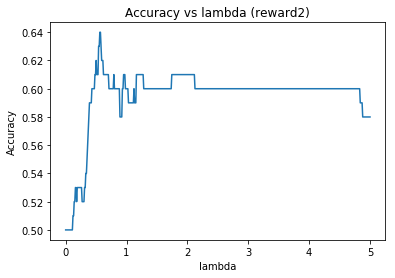

In [30]:
# reward 2
acc2 = get_acc(trans_prob, E2, discount, reward2, ST, AT, num)
print acc2
lambs = np.linspace(0, 5, num)
plt.plot(lambs, acc2)
plt.title('Accuracy vs lambda (reward2)')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.show()

# Question 19

In [31]:
lambda_max2 = lambs[acc2.index(max(acc2))]
print "max:", max(acc2)
print "lambda_max(reward2):", lambda_max2

max: 0.64
lambda_max(reward2): 0.561122244488978


# Question 20

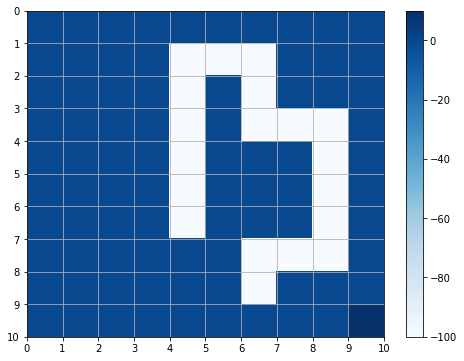

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.2216e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -3.5766e+00 -0.0000e+00  6e+02  1e+01  6e+00  4e+00
 3: -9.8446e+00 -0.0000e+00  2e+03  2e+01  7e+00  1e+01
 4: -1.0823e+02 -0.0000e+00  3e+04  1e+01  6e+00  1e+02
 5: -1.0604e+04 -0.0000e+00  3e+06  1e+01  6e+00  1e+04
 6: -1.0603e+06 -0.0000e+00  3e+08  1e+01  6e+00  1e+06
 7: -1.0603e+08 -0.0000e+00  3e+10  1e+01  6e+00  1e+08
 8: -1.0603e+10 -0.0000e+00  3e+12  1e+01  6e+00  1e+10
Certificate of dual infeasibility found.


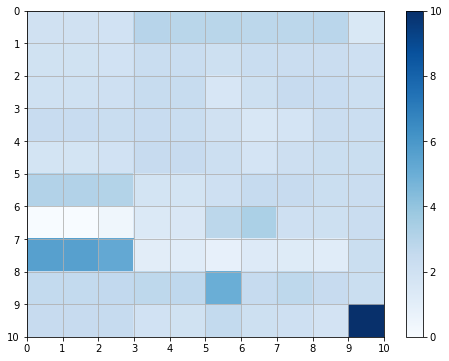

In [32]:
draw_heatmap(reward2)
pred_reward2 = IRL_LP(trans_prob, np.reshape(E2, [-1, 1]), discount, lambda_max2, reward2.max())
pred_reward2 = np.reshape(pred_reward2, (10, 10))
draw_heatmap(pred_reward2)

# Question 21

optimal state values:
[[13.93346306 13.94447961 14.71715113 14.76370239 14.78730908 14.7945596
  15.01143822 15.27745544 15.56372294 16.04281045]
 [15.04848425 15.04914235 15.03485222 14.81209302 14.69915671 14.67057509
  14.84389419 15.70252097 16.62265457 17.5997385 ]
 [16.3694264  16.36890124 16.3132496  15.50108758 14.8180333  14.73486386
  15.64327965 16.60395143 17.92392443 19.48739377]
 [17.61470093 17.62039242 17.5998383  16.49158444 15.62027383 15.96132375
  16.62732634 17.91159557 19.6470624  21.81150851]
 [19.91945624 19.91770726 19.77360165 17.64310747 16.5091341  17.36532395
  18.74167764 19.85713679 21.92096526 24.74081533]
 [21.21504956 21.21825634 21.1466681  19.78766294 17.59099905 19.26373046
  20.5407946  21.93851614 24.82196372 28.47764355]
 [26.71013725 26.68971539 26.181744   21.75677068 19.34234295 20.8012769
  21.75911954 24.74172689 28.54804106 33.2629934 ]
 [26.95410376 26.94225129 26.79587898 26.1703609  22.71606953 25.21910665
  25.71664887 29.2472023  33.66

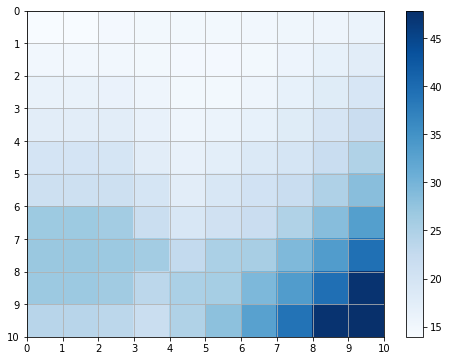

In [33]:
# reward2
(v_ex2, E_ex2) = value_iteration(ST, AT, discount, pred_reward2)
print 'optimal state values:'
print v_ex2
print
print "optimal state values heat map (extracted reward2)"
draw_heatmap(v_ex2)

# Question 23

optimal policy of the agent:
[[1. 1. 3. 0. 2. 3. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]

optimal action (extracted reward2):


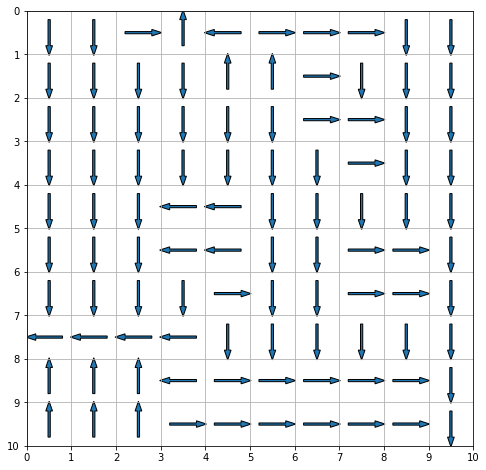

In [34]:
# reward2
print 'optimal policy of the agent:'
print E_ex2
print
print "optimal action (extracted reward2):"
draw_arrow(E_ex2)

# Question 25

In [37]:
def value_iteration(ST,AT,discount,reward):
        
    V = np.zeros((10,10))

    delta = float("inf")
    count = 0
    threshold = 0.01
    while delta > threshold and count < 1000:
        delta = 0
        for row in ST:
            for s in row:
                vs=V[s%10][s/10]       
                sum0=sum1=sum2=sum3=0
                for row2 in ST:
                    for sp in row2:
                        sum0 += transition_probability(s,sp,AT[0])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                        sum1 += transition_probability(s,sp,AT[1])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                        sum2 += transition_probability(s,sp,AT[2])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                        sum3 += transition_probability(s,sp,AT[3])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                V[s%10][s/10]=max(sum0,sum1,sum2,sum3)
                delta=max(delta,abs(vs-V[s%10][s/10]))
        count += 1
        
#     print 'delta = ' + str(delta)
    E = np.zeros((10,10))
    for row in ST:
        for s in row:
            sum00= sum11= sum22= sum33 = 0
            for row2 in ST:
                for sp in row2:             
                    sum00 += transition_probability(s,sp,AT[0])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    sum11 += transition_probability(s,sp,AT[1])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    sum22 += transition_probability(s,sp,AT[2])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    sum33 += transition_probability(s,sp,AT[3])*(reward[sp%10][sp/10]+discount*V[sp%10][sp/10])
                    
            x=[sum00,sum11,sum22,sum33]        
            E[s%10][s/10]=np.argmax(x)

    return V,E

#  return V-matrix and E(action matrix)

In [ ]:
acc22 = get_acc(trans_prob, E2, discount, reward2, ST, AT, num)
print acc22
lambs = np.linspace(0, 5, num)
plt.plot(lambs, acc22)
plt.title('Accuracy vs lambda (reward2)')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.show()

0.0
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -3.1432e+00 -0.0000e+00  2e+03  2e+01  1e+01  4e+00
 2: -7.4524e+00 -0.0000e+00  4e+03  3e+01  1e+01  8e+00
 3: -8.2492e+01 -0.0000e+00  7e+04  3e+01  2e+01  8e+01
 4: -8.1147e+03 -0.0000e+00  7e+06  3e+01  2e+01  8e+03
 5: -8.1131e+05 -0.0000e+00  7e+08  3e+01  2e+01  8e+05
 6: -8.1131e+07 -0.0000e+00  7e+10  3e+01  2e+01  8e+07
 7: -8.1131e+09 -0.0000e+00  7e+12  3e+01  2e+01  8e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 2.]
 [1. 1. 1. 1. 2. 2. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 2. 3. 1.]
 [1. 1. 1. 1. 2. 1. 2. 2. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 3. 1.]
 [0. 0. 0. 2. 2. 2. 2. 2. 3. 1.]
 [0. 0. 0. 0. 0. 0. 0. 3. 3. 1.]]
0.01002004008016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01

[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 2.]
 [1. 1. 1. 1. 2. 2. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 2. 3. 1.]
 [1. 1. 1. 1. 2. 1. 2. 2. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 3. 1.]
 [0. 0. 0. 2. 2. 2. 2. 2. 3. 1.]
 [0. 0. 0. 0. 0. 0. 0. 3. 3. 1.]]
0.1002004008016032
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.8736e+00 -0.0000e+00  1e+03  2e+01  1e+01  4e+00
 2: -6.4587e+00 -0.0000e+00  3e+03  2e+01  1e+01  7e+00
 3: -3.5149e+01 -0.0000e+00  2e+04  2e+01  1e+01  4e+01
 4: -3.1835e+03 -0.0000e+00  2e+06  2e+01  1e+01  3e+03
 5: -3.1823e+05 -0.0000e+00  2e+08  2e+01  1e+01  3e+05
 6: -3.1822e+07 -0.0000e+00  2e+10  2e+01  1e+01  3e+07
 7: -3.1822e+09 -0.0000e+00  2e+12  2e+01  1e+01  3e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 2.]
 [1. 1. 1. 1. 2. 2. 0. 0. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 2. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 2. 2. 2. 3. 3. 1.]
 [0. 0. 0. 0. 0. 0. 3. 3. 3. 1.]]
0.2004008016032064
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.6903e+00 -0.0000e+00  8e+02  2e+01  9e+00  3e+00
 2: -5.4151e+00 -0.0000e+00  2e+03  2e+01  9e+00  6e+00
 3: -2.1158e+01 -0.0000e+00  9e+03  2e+01  9e+00  2e+01
 4: -1.5261e+03 -0.0000e+00  8e+05  2e+01  1e+01  2e+03
 5: -1.5248e+05 -0.0000e+00  8e+07  2e+01  1e+01  2e+05
 6: -1.5247e+07 -0.0000e+00  8e+09  2e+01  1e+01  2e+07
 7: -1.5247e+09 -0.0000e+00  8e+11  2e+01  1e+01  2e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 2. 2. 3. 3. 3. 1.]
 [0. 0. 0. 0. 0. 0. 3. 3. 3. 1.]]
0.3006012024048096
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5256e+00 -0.0000e+00  6e+02  1e+01  8e+00  3e+00
 2: -5.0434e+00 -0.0000e+00  1e+03  2e+01  8e+00  6e+00
 3: -1.5366e+01 -0.0000e+00  6e+03  2e+01  9e+00  2e+01
 4: -7.4509e+02 -0.0000e+00  3e+05  2e+01  9e+00  7e+02
 5: -7.4357e+04 -0.0000e+00  3e+07  2e+01  9e+00  7e+04
 6: -7.4355e+06 -0.0000e+00  3e+09  2e+01  9e+00  7e+06
 7: -7.4355e+08 -0.0000e+00  3e+11  2e+01  9e+00  7e+08
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 2. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 0. 3. 3. 3. 3. 3. 1.]]
0.4008016032064128
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.5421e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -4.7379e+00 -0.0000e+00  9e+02  1e+01  7e+00  5e+00
 3: -1.7517e+01 -0.0000e+00  6e+03  2e+01  9e+00  2e+01
 4: -5.0877e+02 -0.0000e+00  2e+05  2e+01  8e+00  5e+02
 5: -5.0674e+04 -0.0000e+00  2e+07  2e+01  8e+00  5e+04
 6: -5.0672e+06 -0.0000e+00  2e+09  2e+01  8e+00  5e+06
 7: -5.0672e+08 -0.0000e+00  2e+11  2e+01  8e+00  5e+08
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 2. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 2. 3. 3. 1. 1.]
 [1. 1. 

[[1. 1. 3. 0. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 3. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 0. 3. 3. 3. 3. 3. 1.]]
0.501002004008016
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.4361e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -4.2444e+00 -0.0000e+00  7e+02  1e+01  6e+00  5e+00
 3: -1.3154e+01 -0.0000e+00  4e+03  2e+01  8e+00  1e+01
 4: -2.3167e+02 -0.0000e+00  6e+04  1e+01  6e+00  2e+02
 5: -2.3031e+04 -0.0000e+00  6e+06  1e+01  6e+00  2e+04
 6: -2.3030e+06 -0.0000e+00  6e+08  1e+01  6e+00  2e+06
 7: -2.3030e+08 -0.0000e+00  6e+10  1e+01  6e+00  2e+08
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 2. 2. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 3. 3. 1. 1.]
 [1. 1. 1

[[1. 1. 3. 0. 2. 3. 3. 3. 1. 1.]
 [1. 1. 1. 1. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 2. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]
0.5911823647294588
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -2.1263e+00 -0.0000e+00  5e+02  1e+01  7e+00  3e+00
 2: -3.3141e+00 -0.0000e+00  6e+02  1e+01  6e+00  4e+00
 3: -7.7222e+00 -0.0000e+00  2e+03  1e+01  7e+00  8e+00
 4: -6.8247e+01 -0.0000e+00  2e+04  1e+01  6e+00  7e+01
 5: -6.5517e+03 -0.0000e+00  2e+06  1e+01  6e+00  7e+03
 6: -6.5505e+05 -0.0000e+00  2e+08  1e+01  6e+00  7e+05
 7: -6.5505e+07 -0.0000e+00  2e+10  1e+01  6e+00  7e+07
 8: -6.5505e+09 -0.0000e+00  2e+12  1e+01  6e+00  7e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 0. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 1. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]
0.6813627254509018
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.8774e+00 -0.0000e+00  5e+02  2e+01  7e+00  2e+00
 2: -2.8977e+00 -0.0000e+00  5e+02  1e+01  5e+00  3e+00
 3: -5.7588e+00 -0.0000e+00  1e+03  1e+01  6e+00  6e+00
 4: -3.2821e+01 -0.0000e+00  9e+03  1e+01  6e+00  3e+01
 5: -2.6365e+03 -0.0000e+00  8e+05  1e+01  6e+00  3e+03
 6: -2.6348e+05 -0.0000e+00  8e+07  1e+01  6e+00  3e+05
 7: -2.6348e+07 -0.0000e+00  8e+09  1e+01  6e+00  3e+07
 8: -2.6348e+09 -0.0000e+00  8e+11  1e+01  6e+00  3e+09
Certificate of dual infeasibility found.
[[1. 1. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 3. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]]
0.7715430861723447
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.6721e+00 -0.0000e+00  5e+02  2e+01  7e+00  2e+00
 2: -2.6453e+00 -0.0000e+00  4e+02  1e+01  5e+00  3e+00
 3: -5.6211e+00 -0.0000e+00  1e+03  1e+01  5e+00  6e+00
 4: -2.3954e+01 -0.0000e+00  6e+03  1e+01  6e+00  2e+01
 5: -1.6605e+03 -0.0000e+00  5e+05  1e+01  6e+00  2e+03
 6: -1.6591e+05 -0.0000e+00  5e+07  1e+01  6e+00  2e+05
 7: -1.6591e+07 -0.0000e+00  5e+09  1e+01  6e+00  2e+07
 8: -1.6591e+09 -0.0000e+00  5e+11  1e+01  6e+00  2e+09
Certificate of dual infeasibility found.
[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.8617234468937875
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.4999e+00 -0.0000e+00  5e+02  2e+01  7e+00  2e+00
 2: -2.3023e+00 -0.0000e+00  4e+02  1e+01  4e+00  3e+00
 3: -4.8659e+00 -0.0000e+00  9e+02  1e+01  5e+00  5e+00
 4: -1.5578e+01 -0.0000e+00  4e+03  1e+01  5e+00  2e+01
 5: -5.8674e+02 -0.0000e+00  2e+05  1e+01  5e+00  6e+02
 6: -5.8564e+04 -0.0000e+00  2e+07  1e+01  5e+00  6e+04
 7: -5.8563e+06 -0.0000e+00  2e+09  1e+01  5e+00  6e+06
 8: -5.8563e+08 -0.0000e+00  2e+11  1e+01  5e+00  6e+08
Certificate of dual infeasibility found.
[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 1. 0. 0. 0

[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]]
0.9519038076152304
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.3536e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -2.0309e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 3: -4.2534e+00 -0.0000e+00  8e+02  1e+01  5e+00  5e+00
 4: -1.1037e+01 -0.0000e+00  3e+03  1e+01  5e+00  1e+01
 5: -2.1477e+02 -0.0000e+00  5e+04  1e+01  4e+00  2e+02
 6: -2.1366e+04 -0.0000e+00  5e+06  1e+01  4e+00  2e+04
 7: -2.1366e+06 -0.0000e+00  5e+08  1e+01  4e+00  2e+06
 8: -2.1366e+08 -0.0000e+00  5e+10  1e+01  4e+00  2e+08
Certificate of dual infeasibility found.
[[1. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.0420841683366733
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.2281e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -1.8043e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 3: -3.9726e+00 -0.0000e+00  8e+02  1e+01  5e+00  4e+00
 4: -9.2827e+00 -0.0000e+00  3e+03  1e+01  5e+00  1e+01
 5: -1.4159e+02 -0.0000e+00  4e+04  9e+00  4e+00  1e+02
 6: -1.4041e+04 -0.0000e+00  4e+06  9e+00  4e+00  1e+04
 7: -1.4040e+06 -0.0000e+00  4e+08  9e+00  4e+00  1e+06
 8: -1.4040e+08 -0.0000e+00  4e+10  9e+00  4e+00  1e+08
Certificate of dual infeasibility found.
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.1322645290581161
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.1195e+00 -0.0000e+00  5e+02  2e+01  6e+00  2e+00
 2: -1.6095e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 3: -3.8269e+00 -0.0000e+00  8e+02  1e+01  4e+00  4e+00
 4: -8.1737e+00 -0.0000e+00  2e+03  1e+01  4e+00  9e+00
 5: -1.1084e+02 -0.0000e+00  3e+04  9e+00  3e+00  1e+02
 6: -1.0964e+04 -0.0000e+00  3e+06  9e+00  3e+00  1e+04
 7: -1.0964e+06 -0.0000e+00  3e+08  9e+00  3e+00  1e+06
 8: -1.0964e+08 -0.0000e+00  3e+10  9e+00  3e+00  1e+08
Certificate of dual infeasibility found.
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 3. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.222444889779559
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -1.0249e+00 -0.0000e+00  5e+02  2e+01  5e+00  2e+00
 2: -1.4401e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 3: -3.7636e+00 -0.0000e+00  9e+02  1e+01  4e+00  4e+00
 4: -7.3335e+00 -0.0000e+00  2e+03  1e+01  4e+00  8e+00
 5: -9.3670e+01 -0.0000e+00  3e+04  9e+00  3e+00  9e+01
 6: -9.2479e+03 -0.0000e+00  3e+06  9e+00  3e+00  9e+03
 7: -9.2476e+05 -0.0000e+00  3e+08  9e+00  3e+00  9e+05
 8: -9.2476e+07 -0.0000e+00  3e+10  9e+00  3e+00  9e+07
Certificate of dual infeasibility found.
[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3.

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.3126252505010019
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  1e+01  1e+00
 1: -9.4190e-01 -0.0000e+00  5e+02  2e+01  5e+00  1e+00
 2: -1.2922e+00 -0.0000e+00  2e+02  8e+00  3e+00  2e+00
 3: -3.7593e+00 -0.0000e+00  1e+03  1e+01  4e+00  4e+00
 4: -6.6452e+00 -0.0000e+00  2e+03  1e+01  4e+00  7e+00
 5: -8.2652e+01 -0.0000e+00  2e+04  8e+00  3e+00  8e+01
 6: -8.1457e+03 -0.0000e+00  2e+06  8e+00  3e+00  8e+03
 7: -8.1455e+05 -0.0000e+00  2e+08  8e+00  3e+00  8e+05
 8: -8.1455e+07 -0.0000e+00  2e+10  8e+00  3e+00  8e+07
 9: -8.1455e+09 -0.0000e+00  2e+12  8e+00  3e+00  8e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.4028056112224447
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -8.6874e-01 -0.0000e+00  5e+02  2e+01  5e+00  1e+00
 2: -1.1627e+00 -0.0000e+00  2e+02  8e+00  2e+00  1e+00
 3: -3.7970e+00 -0.0000e+00  1e+03  1e+01  4e+00  4e+00
 4: -6.0565e+00 -0.0000e+00  2e+03  1e+01  4e+00  6e+00
 5: -7.5122e+01 -0.0000e+00  2e+04  8e+00  3e+00  8e+01
 6: -7.3918e+03 -0.0000e+00  2e+06  8e+00  3e+00  7e+03
 7: -7.3916e+05 -0.0000e+00  2e+08  8e+00  3e+00  7e+05
 8: -7.3916e+07 -0.0000e+00  2e+10  8e+00  3e+00  7e+07
 9: -7.3916e+09 -0.0000e+00  2e+12  8e+00  3e+00  7e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.4929859719438878
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  9e+00  1e+00
 1: -8.0387e-01 -0.0000e+00  5e+02  2e+01  5e+00  1e+00
 2: -1.0491e+00 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.8574e+00 -0.0000e+00  1e+03  1e+01  4e+00  4e+00
 4: -5.5334e+00 -0.0000e+00  2e+03  1e+01  3e+00  6e+00
 5: -6.9922e+01 -0.0000e+00  2e+04  8e+00  2e+00  7e+01
 6: -6.8719e+03 -0.0000e+00  2e+06  8e+00  2e+00  7e+03
 7: -6.8718e+05 -0.0000e+00  2e+08  8e+00  2e+00  7e+05
 8: -6.8718e+07 -0.0000e+00  2e+10  8e+00  2e+00  7e+07
 9: -6.8718e+09 -0.0000e+00  2e+12  8e+00  2e+00  7e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.5831663326653307
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -7.4608e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -9.4825e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.8907e+00 -0.0000e+00  1e+03  2e+01  5e+00  4e+00
 4: -5.0310e+00 -0.0000e+00  2e+03  1e+01  3e+00  5e+00
 5: -6.6152e+01 -0.0000e+00  2e+04  7e+00  2e+00  7e+01
 6: -6.4995e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -6.4995e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -6.4995e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -6.4995e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.6733466933867736
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -6.9436e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -8.5365e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.7180e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -4.5072e+00 -0.0000e+00  2e+03  9e+00  3e+00  5e+00
 5: -6.2200e+01 -0.0000e+00  2e+04  7e+00  2e+00  6e+01
 6: -6.1150e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -6.1150e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -6.1150e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -6.1150e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 0. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 3. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.7635270541082164
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  8e+00  1e+00
 1: -6.4786e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -7.7226e-01 -0.0000e+00  2e+02  7e+00  2e+00  1e+00
 3: -3.5699e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -4.0340e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -5.7107e+01 -0.0000e+00  2e+04  7e+00  2e+00  6e+01
 6: -5.6115e+03 -0.0000e+00  2e+06  7e+00  2e+00  6e+03
 7: -5.6115e+05 -0.0000e+00  2e+08  7e+00  2e+00  6e+05
 8: -5.6115e+07 -0.0000e+00  2e+10  7e+00  2e+00  6e+07
 9: -5.6115e+09 -0.0000e+00  2e+12  7e+00  2e+00  6e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.8537074148296593
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -6.0590e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -7.0183e-01 -0.0000e+00  2e+02  7e+00  2e+00  9e-01
 3: -3.3790e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -3.6898e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -5.2164e+01 -0.0000e+00  2e+04  7e+00  2e+00  5e+01
 6: -5.1218e+03 -0.0000e+00  2e+06  7e+00  2e+00  5e+03
 7: -5.1218e+05 -0.0000e+00  2e+08  7e+00  2e+00  5e+05
 8: -5.1218e+07 -0.0000e+00  2e+10  7e+00  2e+00  5e+07
 9: -5.1218e+09 -0.0000e+00  2e+12  7e+00  2e+00  5e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
1.9438877755511021
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -5.6789e-01 -0.0000e+00  5e+02  1e+01  4e+00  1e+00
 2: -6.4053e-01 -0.0000e+00  2e+02  6e+00  2e+00  9e-01
 3: -3.0413e+00 -0.0000e+00  2e+03  2e+01  4e+00  4e+00
 4: -3.6214e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -4.4421e+01 -0.0000e+00  2e+04  6e+00  2e+00  4e+01
 6: -4.3213e+03 -0.0000e+00  2e+06  6e+00  2e+00  4e+03
 7: -4.3213e+05 -0.0000e+00  2e+08  6e+00  2e+00  4e+05
 8: -4.3213e+07 -0.0000e+00  2e+10  6e+00  2e+00  4e+07
 9: -4.3213e+09 -0.0000e+00  2e+12  6e+00  2e+00  4e+09
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.034068136272545
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -5.3334e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -5.8690e-01 -0.0000e+00  2e+02  6e+00  2e+00  8e-01
 3: -2.7420e+00 -0.0000e+00  1e+03  1e+01  4e+00  3e+00
 4: -3.4500e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -3.2436e+01 -0.0000e+00  1e+04  7e+00  2e+00  3e+01
 6: -3.1328e+03 -0.0000e+00  1e+06  7e+00  2e+00  3e+03
 7: -3.1328e+05 -0.0000e+00  1e+08  7e+00  2e+00  3e+05
 8: -3.1328e+07 -0.0000e+00  1e+10  7e+00  2e+00  3e+07
 9: -3.1328e+09 -0.0000e+00  1e+12  7e+00  2e+00  3e+09
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.124248496993988
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  7e+00  1e+00
 1: -5.0184e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -5.3975e-01 -0.0000e+00  2e+02  6e+00  1e+00  8e-01
 3: -2.4771e+00 -0.0000e+00  1e+03  1e+01  3e+00  3e+00
 4: -3.2163e+00 -0.0000e+00  2e+03  9e+00  2e+00  4e+00
 5: -1.9972e+01 -0.0000e+00  9e+03  7e+00  2e+00  2e+01
 6: -1.8477e+03 -0.0000e+00  8e+05  7e+00  2e+00  2e+03
 7: -1.8476e+05 -0.0000e+00  8e+07  7e+00  2e+00  2e+05
 8: -1.8476e+07 -0.0000e+00  8e+09  7e+00  2e+00  2e+07
 9: -1.8476e+09 -0.0000e+00  8e+11  7e+00  2e+00  2e+09
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.214428857715431
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.7301e-01 -0.0000e+00  5e+02  1e+01  3e+00  1e+00
 2: -4.9809e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -2.1270e+00 -0.0000e+00  1e+03  1e+01  3e+00  3e+00
 4: -2.9007e+00 -0.0000e+00  2e+03  1e+01  2e+00  3e+00
 5: -1.1122e+01 -0.0000e+00  6e+03  7e+00  2e+00  1e+01
 6: -7.6601e+02 -0.0000e+00  4e+05  7e+00  2e+00  8e+02
 7: -7.6593e+04 -0.0000e+00  4e+07  7e+00  2e+00  8e+04
 8: -7.6593e+06 -0.0000e+00  4e+09  7e+00  2e+00  8e+06
 9: -7.6593e+08 -0.0000e+00  4e+11  7e+00  2e+00  8e+08
Certificate of dual infeasibility fou

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 1. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.3046092184368736
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.4657e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.6113e-01 -0.0000e+00  2e+02  6e+00  1e+00  7e-01
 3: -1.6981e+00 -0.0000e+00  9e+02  1e+01  3e+00  2e+00
 4: -2.5248e+00 -0.0000e+00  1e+03  9e+00  2e+00  3e+00
 5: -6.9713e+00 -0.0000e+00  4e+03  8e+00  2e+00  7e+00
 6: -2.1778e+02 -0.0000e+00  9e+04  6e+00  1e+00  2e+02
 7: -2.1763e+04 -0.0000e+00  9e+06  6e+00  1e+00  2e+04
 8: -2.1763e+06 -0.0000e+00  9e+08  6e+00  1e+00  2e+06
 9: -2.1763e+08 -0.0000e+00  9e+10  6e+00  1e+00  2e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.3947895791583167
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.2232e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.2824e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.4014e+00 -0.0000e+00  7e+02  1e+01  2e+00  2e+00
 4: -2.2113e+00 -0.0000e+00  1e+03  9e+00  2e+00  3e+00
 5: -5.6205e+00 -0.0000e+00  3e+03  7e+00  2e+00  6e+00
 6: -1.3743e+02 -0.0000e+00  6e+04  6e+00  1e+00  1e+02
 7: -1.3719e+04 -0.0000e+00  6e+06  6e+00  1e+00  1e+04
 8: -1.3720e+06 -0.0000e+00  6e+08  6e+00  1e+00  1e+06
 9: -1.3720e+08 -0.0000e+00  6e+10  6e+00  1e+00  1e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.4849699398797593
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -4.0506e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -4.0264e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.1924e+00 -0.0000e+00  6e+02  1e+01  2e+00  2e+00
 4: -1.9998e+00 -0.0000e+00  1e+03  8e+00  2e+00  2e+00
 5: -4.9175e+00 -0.0000e+00  3e+03  7e+00  1e+00  5e+00
 6: -1.1551e+02 -0.0000e+00  5e+04  5e+00  1e+00  1e+02
 7: -1.1523e+04 -0.0000e+00  5e+06  5e+00  1e+00  1e+04
 8: -1.1523e+06 -0.0000e+00  5e+08  5e+00  1e+00  1e+06
 9: -1.1523e+08 -0.0000e+00  5e+10  5e+00  1e+00  1e+08
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 0. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.5751503006012024
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -3.8906e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -3.7947e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -1.0326e+00 -0.0000e+00  5e+02  9e+00  2e+00  1e+00
 4: -1.7300e+00 -0.0000e+00  9e+02  8e+00  2e+00  2e+00
 5: -3.9922e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -7.2851e+01 -0.0000e+00  3e+04  5e+00  1e+00  7e+01
 7: -7.2410e+03 -0.0000e+00  3e+06  5e+00  1e+00  7e+03
 8: -7.2411e+05 -0.0000e+00  3e+08  5e+00  1e+00  7e+05
 9: -7.2411e+07 -0.0000e+00  3e+10  5e+00  1e+00  7e+07
Certificate of dual infeasibility fo

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.665330661322645
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  6e+00  1e+00
 1: -3.7420e-01 -0.0000e+00  5e+02  1e+01  3e+00  9e-01
 2: -3.5844e-01 -0.0000e+00  2e+02  6e+00  1e+00  6e-01
 3: -9.0670e-01 -0.0000e+00  5e+02  8e+00  2e+00  1e+00
 4: -1.5029e+00 -0.0000e+00  8e+02  8e+00  1e+00  2e+00
 5: -3.7178e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -4.5562e+01 -0.0000e+00  2e+04  5e+00  1e+00  5e+01
 7: -4.4753e+03 -0.0000e+00  2e+06  5e+00  1e+00  4e+03
 8: -4.4753e+05 -0.0000e+00  2e+08  5e+00  1e+00  4e+05
 9: -4.4753e+07 -0.0000e+00  2e+10  5e+00  1e+00  4e+07
10: -4.4753e+09 -0.0000e+00  2e+12  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.7454909819639277
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.6187e-01 -0.0000e+00  5e+02  1e+01  3e+00  8e-01
 2: -3.4132e-01 -0.0000e+00  2e+02  5e+00  1e+00  5e-01
 3: -8.1543e-01 -0.0000e+00  4e+02  8e+00  2e+00  1e+00
 4: -1.3426e+00 -0.0000e+00  7e+02  7e+00  1e+00  2e+00
 5: -3.7843e+00 -0.0000e+00  2e+03  7e+00  1e+00  4e+00
 6: -2.7847e+01 -0.0000e+00  1e+04  5e+00  1e+00  3e+01
 7: -2.6219e+03 -0.0000e+00  1e+06  5e+00  1e+00  3e+03
 8: -2.6219e+05 -0.0000e+00  1e+08  5e+00  1e+00  3e+05
 9: -2.6219e+07 -0.0000e+00  1e+10  5e+00  1e+00  3e+07
10: -2.6219e+09 -0.0000e+00  1e+12  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 1. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.8256513026052104
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.5030e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.2555e-01 -0.0000e+00  2e+02  5e+00  1e+00  5e-01
 3: -7.3882e-01 -0.0000e+00  4e+02  8e+00  1e+00  1e+00
 4: -1.2098e+00 -0.0000e+00  6e+02  7e+00  1e+00  1e+00
 5: -3.2482e+00 -0.0000e+00  2e+03  7e+00  1e+00  3e+00
 6: -2.7000e+01 -0.0000e+00  1e+04  5e+00  9e-01  3e+01
 7: -2.5438e+03 -0.0000e+00  1e+06  5e+00  9e-01  3e+03
 8: -2.5438e+05 -0.0000e+00  1e+08  5e+00  9e-01  3e+05
 9: -2.5438e+07 -0.0000e+00  1e+10  5e+00  9e-01  3e+07
10: -2.5438e+09 -0.0000e+00  1e+12  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.905811623246493
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.3943e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -3.1097e-01 -0.0000e+00  2e+02  5e+00  1e+00  5e-01
 3: -6.7368e-01 -0.0000e+00  4e+02  7e+00  1e+00  9e-01
 4: -1.0979e+00 -0.0000e+00  6e+02  7e+00  1e+00  1e+00
 5: -2.7808e+00 -0.0000e+00  2e+03  7e+00  1e+00  3e+00
 6: -2.0605e+01 -0.0000e+00  9e+03  5e+00  9e-01  2e+01
 7: -1.9090e+03 -0.0000e+00  9e+05  5e+00  9e-01  2e+03
 8: -1.9091e+05 -0.0000e+00  9e+07  5e+00  9e-01  2e+05
 9: -1.9091e+07 -0.0000e+00  9e+09  5e+00  9e-01  2e+07
10: -1.9091e+09 -0.0000e+00  9e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
2.9859719438877756
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.2922e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.9747e-01 -0.0000e+00  2e+02  5e+00  9e-01  5e-01
 3: -6.1767e-01 -0.0000e+00  3e+02  7e+00  1e+00  9e-01
 4: -1.0021e+00 -0.0000e+00  5e+02  7e+00  1e+00  1e+00
 5: -2.4644e+00 -0.0000e+00  1e+03  7e+00  1e+00  3e+00
 6: -1.5649e+01 -0.0000e+00  8e+03  5e+00  8e-01  2e+01
 7: -1.4665e+03 -0.0000e+00  7e+05  5e+00  8e-01  1e+03
 8: -1.4665e+05 -0.0000e+00  7e+07  5e+00  8e-01  1e+05
 9: -1.4665e+07 -0.0000e+00  7e+09  5e+00  8e-01  1e+07
10: -1.4665e+09 -0.0000e+00  7e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.066132264529058
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.1960e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.8496e-01 -0.0000e+00  2e+02  5e+00  9e-01  5e-01
 3: -5.6903e-01 -0.0000e+00  3e+02  7e+00  1e+00  8e-01
 4: -9.1904e-01 -0.0000e+00  5e+02  7e+00  1e+00  1e+00
 5: -2.1500e+00 -0.0000e+00  1e+03  7e+00  1e+00  2e+00
 6: -9.8183e+00 -0.0000e+00  5e+03  5e+00  9e-01  1e+01
 7: -8.1937e+02 -0.0000e+00  4e+05  5e+00  9e-01  8e+02
 8: -8.1938e+04 -0.0000e+00  4e+07  5e+00  9e-01  8e+04
 9: -8.1938e+06 -0.0000e+00  4e+09  5e+00  9e-01  8e+06
10: -8.1938e+08 -0.0000e+00  4e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.1462925851703405
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.1054e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.7333e-01 -0.0000e+00  1e+02  5e+00  8e-01  5e-01
 3: -5.2643e-01 -0.0000e+00  3e+02  6e+00  1e+00  8e-01
 4: -8.4632e-01 -0.0000e+00  5e+02  6e+00  1e+00  1e+00
 5: -1.9314e+00 -0.0000e+00  1e+03  7e+00  1e+00  2e+00
 6: -7.4642e+00 -0.0000e+00  4e+03  5e+00  9e-01  8e+00
 7: -5.2381e+02 -0.0000e+00  3e+05  5e+00  9e-01  5e+02
 8: -5.2381e+04 -0.0000e+00  3e+07  5e+00  9e-01  5e+04
 9: -5.2381e+06 -0.0000e+00  3e+09  5e+00  9e-01  5e+06
10: -5.2381e+08 -0.0000e+00  3e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.226452905811623
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -3.0199e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.6251e-01 -0.0000e+00  1e+02  5e+00  8e-01  4e-01
 3: -4.8885e-01 -0.0000e+00  3e+02  6e+00  1e+00  7e-01
 4: -7.8208e-01 -0.0000e+00  4e+02  6e+00  1e+00  1e+00
 5: -1.7651e+00 -0.0000e+00  1e+03  6e+00  1e+00  2e+00
 6: -6.1322e+00 -0.0000e+00  4e+03  5e+00  9e-01  6e+00
 7: -3.5262e+02 -0.0000e+00  2e+05  5e+00  8e-01  4e+02
 8: -3.5260e+04 -0.0000e+00  2e+07  5e+00  8e-01  4e+04
 9: -3.5260e+06 -0.0000e+00  2e+09  5e+00  8e-01  4e+06
10: -3.5260e+08 -0.0000e+00  2e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.306613226452906
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  5e+00  1e+00
 1: -2.9393e-01 -0.0000e+00  5e+02  1e+01  2e+00  8e-01
 2: -2.5242e-01 -0.0000e+00  1e+02  5e+00  8e-01  4e-01
 3: -4.5547e-01 -0.0000e+00  3e+02  6e+00  1e+00  7e-01
 4: -7.2490e-01 -0.0000e+00  4e+02  6e+00  1e+00  9e-01
 5: -1.6342e+00 -0.0000e+00  1e+03  6e+00  1e+00  2e+00
 6: -5.2643e+00 -0.0000e+00  3e+03  5e+00  8e-01  5e+00
 7: -2.5557e+02 -0.0000e+00  1e+05  5e+00  7e-01  3e+02
 8: -2.5552e+04 -0.0000e+00  1e+07  5e+00  7e-01  3e+04
 9: -2.5552e+06 -0.0000e+00  1e+09  5e+00  7e-01  3e+06
10: -2.5552e+08 -0.0000e+00  1e+11  5

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.3867735470941884
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  4e+00  1e+00
 1: -2.8632e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.4299e-01 -0.0000e+00  1e+02  5e+00  8e-01  4e-01
 3: -4.2563e-01 -0.0000e+00  3e+02  6e+00  9e-01  6e-01
 4: -6.7365e-01 -0.0000e+00  4e+02  6e+00  9e-01  9e-01
 5: -1.5274e+00 -0.0000e+00  1e+03  6e+00  1e+00  2e+00
 6: -4.5851e+00 -0.0000e+00  3e+03  5e+00  8e-01  5e+00
 7: -1.9364e+02 -0.0000e+00  1e+05  4e+00  7e-01  2e+02
 8: -1.9356e+04 -0.0000e+00  1e+07  4e+00  7e-01  2e+04
 9: -1.9356e+06 -0.0000e+00  1e+09  4e+00  7e-01  2e+06
10: -1.9356e+08 -0.0000e+00  1e+11  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.4669338677354706
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.7912e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.3418e-01 -0.0000e+00  1e+02  5e+00  7e-01  4e-01
 3: -3.9882e-01 -0.0000e+00  2e+02  6e+00  9e-01  6e-01
 4: -6.2747e-01 -0.0000e+00  4e+02  6e+00  9e-01  8e-01
 5: -1.4381e+00 -0.0000e+00  1e+03  6e+00  9e-01  2e+00
 6: -4.0450e+00 -0.0000e+00  3e+03  5e+00  8e-01  4e+00
 7: -1.5404e+02 -0.0000e+00  9e+04  4e+00  7e-01  2e+02
 8: -1.5394e+04 -0.0000e+00  9e+06  4e+00  7e-01  2e+04
 9: -1.5394e+06 -0.0000e+00  9e+08  4e+00  7e-01  2e+06
10: -1.5394e+08 -0.0000e+00  9e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.5470941883767533
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.7231e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.2593e-01 -0.0000e+00  1e+02  5e+00  7e-01  4e-01
 3: -3.7461e-01 -0.0000e+00  2e+02  5e+00  8e-01  6e-01
 4: -5.8562e-01 -0.0000e+00  4e+02  6e+00  8e-01  8e-01
 5: -1.3619e+00 -0.0000e+00  1e+03  6e+00  9e-01  2e+00
 6: -3.6277e+00 -0.0000e+00  3e+03  5e+00  8e-01  4e+00
 7: -1.2899e+02 -0.0000e+00  7e+04  4e+00  6e-01  1e+02
 8: -1.2887e+04 -0.0000e+00  7e+06  4e+00  6e-01  1e+04
 9: -1.2887e+06 -0.0000e+00  7e+08  4e+00  6e-01  1e+06
10: -1.2887e+08 -0.0000e+00  7e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.627254509018036
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.6587e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.1819e-01 -0.0000e+00  1e+02  5e+00  7e-01  4e-01
 3: -3.5265e-01 -0.0000e+00  2e+02  5e+00  8e-01  5e-01
 4: -5.4754e-01 -0.0000e+00  3e+02  5e+00  8e-01  7e-01
 5: -1.2961e+00 -0.0000e+00  9e+02  6e+00  9e-01  2e+00
 6: -3.2907e+00 -0.0000e+00  2e+03  5e+00  7e-01  3e+00
 7: -1.1262e+02 -0.0000e+00  7e+04  4e+00  6e-01  1e+02
 8: -1.1249e+04 -0.0000e+00  7e+06  4e+00  6e-01  1e+04
 9: -1.1249e+06 -0.0000e+00  7e+08  4e+00  6e-01  1e+06
10: -1.1249e+08 -0.0000e+00  7e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.7074148296593186
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.5977e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.1093e-01 -0.0000e+00  1e+02  4e+00  6e-01  4e-01
 3: -3.3265e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 4: -5.1272e-01 -0.0000e+00  3e+02  5e+00  8e-01  7e-01
 5: -1.2386e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -3.0093e+00 -0.0000e+00  2e+03  5e+00  7e-01  3e+00
 7: -9.8065e+01 -0.0000e+00  6e+04  4e+00  6e-01  1e+02
 8: -9.7914e+03 -0.0000e+00  6e+06  4e+00  6e-01  1e+04
 9: -9.7915e+05 -0.0000e+00  6e+08  4e+00  6e-01  1e+06
10: -9.7915e+07 -0.0000e+00  6e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.787575150300601
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.5399e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -2.0409e-01 -0.0000e+00  1e+02  4e+00  6e-01  4e-01
 3: -3.1436e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 4: -4.8078e-01 -0.0000e+00  3e+02  5e+00  7e-01  7e-01
 5: -1.1880e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -2.7682e+00 -0.0000e+00  2e+03  5e+00  7e-01  3e+00
 7: -8.3238e+01 -0.0000e+00  5e+04  4e+00  5e-01  8e+01
 8: -8.3066e+03 -0.0000e+00  5e+06  4e+00  5e-01  8e+03
 9: -8.3066e+05 -0.0000e+00  5e+08  4e+00  5e-01  8e+05
10: -8.3066e+07 -0.0000e+00  5e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.8677354709418834
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.4850e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.9766e-01 -0.0000e+00  1e+02  4e+00  6e-01  4e-01
 3: -2.9757e-01 -0.0000e+00  2e+02  5e+00  7e-01  5e-01
 4: -4.5137e-01 -0.0000e+00  3e+02  5e+00  7e-01  6e-01
 5: -1.1432e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -2.5572e+00 -0.0000e+00  2e+03  5e+00  6e-01  3e+00
 7: -7.1118e+01 -0.0000e+00  5e+04  4e+00  5e-01  7e+01
 8: -7.0931e+03 -0.0000e+00  5e+06  4e+00  5e-01  7e+03
 9: -7.0932e+05 -0.0000e+00  5e+08  4e+00  5e-01  7e+05
10: -7.0932e+07 -0.0000e+00  5e+10  

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
3.947895791583166
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.4330e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.9159e-01 -0.0000e+00  1e+02  4e+00  6e-01  3e-01
 3: -2.8212e-01 -0.0000e+00  2e+02  5e+00  6e-01  4e-01
 4: -4.2422e-01 -0.0000e+00  3e+02  5e+00  6e-01  6e-01
 5: -1.1034e+00 -0.0000e+00  9e+02  6e+00  8e-01  1e+00
 6: -2.3691e+00 -0.0000e+00  2e+03  4e+00  6e-01  3e+00
 7: -5.9172e+01 -0.0000e+00  4e+04  4e+00  5e-01  6e+01
 8: -5.8977e+03 -0.0000e+00  4e+06  4e+00  5e-01  6e+03
 9: -5.8977e+05 -0.0000e+00  4e+08  4e+00  5e-01  6e+05
10: -5.8977e+07 -0.0000e+00  4e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.028056112224449
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.3836e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.8586e-01 -0.0000e+00  1e+02  4e+00  6e-01  3e-01
 3: -2.6785e-01 -0.0000e+00  2e+02  4e+00  6e-01  4e-01
 4: -3.9907e-01 -0.0000e+00  3e+02  5e+00  6e-01  6e-01
 5: -1.0679e+00 -0.0000e+00  9e+02  6e+00  7e-01  1e+00
 6: -2.1989e+00 -0.0000e+00  2e+03  4e+00  6e-01  2e+00
 7: -5.0207e+01 -0.0000e+00  3e+04  4e+00  5e-01  5e+01
 8: -5.0028e+03 -0.0000e+00  3e+06  4e+00  5e-01  5e+03
 9: -5.0029e+05 -0.0000e+00  3e+08  4e+00  5e-01  5e+05
10: -5.0029e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.108216432865731
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.3366e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.8045e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.5462e-01 -0.0000e+00  2e+02  4e+00  6e-01  4e-01
 4: -3.7571e-01 -0.0000e+00  3e+02  4e+00  6e-01  5e-01
 5: -1.0364e+00 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -2.0427e+00 -0.0000e+00  2e+03  4e+00  6e-01  2e+00
 7: -4.3261e+01 -0.0000e+00  3e+04  4e+00  5e-01  4e+01
 8: -4.3127e+03 -0.0000e+00  3e+06  4e+00  5e-01  4e+03
 9: -4.3127e+05 -0.0000e+00  3e+08  4e+00  5e-01  4e+05
10: -4.3127e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.188376753507014
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.2920e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.7533e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.4234e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 4: -3.5398e-01 -0.0000e+00  2e+02  4e+00  6e-01  5e-01
 5: -1.0083e+00 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -1.8977e+00 -0.0000e+00  2e+03  4e+00  5e-01  2e+00
 7: -3.7725e+01 -0.0000e+00  3e+04  4e+00  5e-01  4e+01
 8: -3.7570e+03 -0.0000e+00  3e+06  4e+00  5e-01  4e+03
 9: -3.7571e+05 -0.0000e+00  3e+08  4e+00  5e-01  4e+05
10: -3.7571e+07 -0.0000e+00  3e+10  4

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [1. 1. 3. 3. 1. 3. 3. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 3. 3. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 3. 1. 1.]
 [1. 1. 1. 1. 3. 3. 3. 3. 1. 1.]
 [3. 3. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]]
4.268537074148297
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.2496e-01 -0.0000e+00  5e+02  1e+01  2e+00  7e-01
 2: -1.7047e-01 -0.0000e+00  1e+02  4e+00  5e-01  3e-01
 3: -2.3090e-01 -0.0000e+00  2e+02  4e+00  5e-01  4e-01
 4: -3.3371e-01 -0.0000e+00  2e+02  4e+00  5e-01  5e-01
 5: -9.8350e-01 -0.0000e+00  9e+02  5e+00  7e-01  1e+00
 6: -1.7617e+00 -0.0000e+00  2e+03  4e+00  5e-01  2e+00
 7: -3.3198e+01 -0.0000e+00  3e+04  4e+00  4e-01  3e+01
 8: -3.3021e+03 -0.0000e+00  3e+06  4e+00  4e-01  3e+03
 9: -3.3021e+05 -0.0000e+00  3e+08  4e+00  4e-01  3e+05
10: -3.3021e+07 -0.0000e+00  3e+10  4

In [ ]:
lambda_max22 = lambs[acc22.index(max(acc22))]
print "max:", max(acc22)
print "lambda_max(reward2):", lambda_max22

In [ ]:
pred_reward2 = IRL_LP(trans_prob, np.reshape(E2, [-1, 1]), discount, lambda_max22, reward2.max())
pred_reward2 = np.reshape(pred_reward22, (10, 10))
draw_heatmap(pred_reward22)

In [ ]:
(v_ex22, E_ex22) = value_iteration(ST, AT, discount, pred_reward22)
print 'optimal state values:'
print v_ex22
print
print "optimal state values heat map (extracted reward2)"
draw_heatmap(v_ex22)

In [ ]:
# reward2
print 'optimal policy of the agent:'
print E_ex22
print
print "optimal action (extracted reward2):"
draw_arrow(E_ex22)